<a href="https://colab.research.google.com/github/gasbas/DeepLearning2/blob/robin%2Fupdate_experiment/Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from principal_RBM_alpha import * 
from principal_DBN_alpha import * 
from principal_DNN_MNIST import * 
import torch
import numpy as np
from time import time
from tqdm import tqdm
import torchvision

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'

### Visualisation du préentrainement d'une RBM sur BinaryAlphaDigits

Nous allons visualiser l'entrainement de notre RBM sur la base de données BinaryAlphadigits. Dans un premier temps, on considère le préentrainement sur le nombre $8$

In [ ]:
index = 10
X  = lire_alpha_digit(index, device)

In [ ]:
print('Les données contiennent:')
print(f'{X.size(0)} examples')
print(f'{X.size(1)} pixels')


Les données contiennent:
39 examples
320 pixels


In [ ]:

p = X.size(1) #Nombre de pixels
qs = [10,100,500] #Test de différents nombres de neuronnes dans la couche cachée
batch_size = 10 #Le nombre de données par batch
lr = 0.1 #Le pas dans la gradient ascent
epochs = 1000 #Le nombre d'itérations (nombre de fois que le modèle voit toutes les données)
n_images = 2 #Nombre d'images à générer une fois la RBM entrainée
gibbs_iter = 1000 #Nombre d'itération dans le gibbs sampler pour générer une image

historique = []
images_RBM = []
times_RBM = []

for q in qs : 
    t0 = time()
    print(f'RBM avec {q} neuronnes')
    RBM = init_RBM(p, q, device)
    trained_RBM, history = train_RBM(X, RBM, epochs, lr, batch_size)
    historique.append(history)
    gen_images = generer_image_RBM(trained_RBM, gibbs_iter, n_images, plot = False)
    print('')
    times_RBM.append(time()-t0)
    images_RBM.append(gen_images)

RBM avec 10 neuronnes


EPOCH 999 - Reconstruction Error: 21.3517: 100%|█| 1000/1000 [00:04<00:00, 206.6



RBM avec 100 neuronnes


EPOCH 999 - Reconstruction Error: 0.0289: 100%|█| 1000/1000 [00:05<00:00, 190.77



RBM avec 500 neuronnes


EPOCH 999 - Reconstruction Error: 0.0010: 100%|█| 1000/1000 [00:05<00:00, 183.09


In [ ]:
print(f'Training time (GPU) 10 neuronnes: {times_RBM[0]:0.3f} seconds')
print(f'Training time (GPU) 100 neuronnes: {times_RBM[1]:0.3f} seconds')
print(f'Training time (GPU) 500 neuronnes: {times_RBM[2]:0.3f} seconds')

Training time (GPU) 10 neuronnes: 5.137 seconds
Training time (GPU) 100 neuronnes: 5.569 seconds
Training time (GPU) 500 neuronnes: 5.826 seconds


Le temps d'entraînement n'augmente presque pas avec le nombre de neuronnes. Cela est probablement du à l'utilisation du GPU par Pytorch

Text(0, 0.5, 'Reconstruction Error')

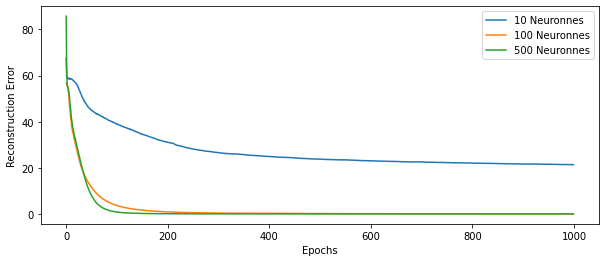

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(historique[0], label = '10 Neuronnes')
plt.plot(historique[1], label = '100 Neuronnes')
plt.plot(historique[2], label = '500 Neuronnes')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Reconstruction Error')


Nous voyons qu'une RBM avec 10 neuronnes ne convergent pas, tandis qu'une RBM avec 100 ou 500 neuronnes convergent vers une erreur de reconstruction très faible. Par ailleurs, l'utilisation de 500 neuronnes permet une convergence plus rapide.

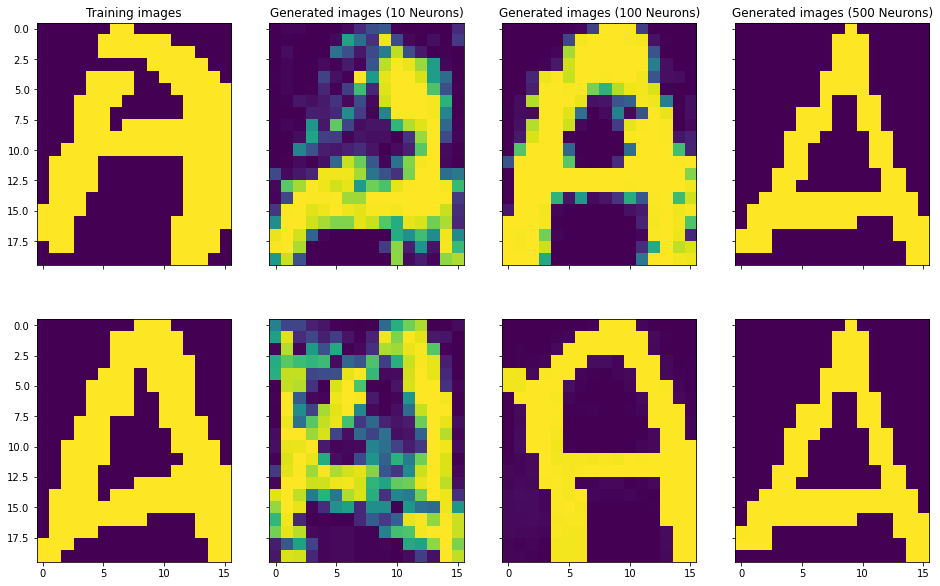

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, sharex = True, sharey = True, figsize = (16,10))

ax[0,0].imshow(X[0].view(20,16).cpu().numpy())
ax[1,0].imshow(X[10].view(20,16).cpu().numpy())
ax[0,0].set_title('Training images')

ax[0,1].imshow(images_RBM[0][0])
ax[1,1].imshow(images_RBM[0][1])
ax[0,1].set_title('Generated images (10 Neurons)')

ax[0,2].imshow(images_RBM[1][0])
ax[1,2].imshow(images_RBM[1][1])
ax[0,2].set_title('Generated images (100 Neurons)')

ax[0,3].imshow(images_RBM[2][0])
ax[1,3].imshow(images_RBM[2][1])
_=ax[0,3].set_title('Generated images (500 Neurons)')


Les RBM avec 100 et 500 neuronnes génèrent des images aussi proche que celles utilisées pourt l'entraînement.

### Visualisation du préentrainement d'un DBN sur BinaryAlphaDigits

In [ ]:

p = X.size(1) #Nombre de pixels
qs = [100,500] #Test de différents nombres de neuronnes dans la couche cachée
n_layers = [2,5]
batch_size = 10 #Le nombre de données par batch
lr = 0.1 #Le pas dans la gradient ascent
epochs = 1000 #Le nombre d'itérations (nombre de fois que le modèle voit toutes les données)
n_images = 2 #Nombre d'images à générer une fois la RBM entrainée
gibbs_iter = 1000 #Nombre d'itération dans le gibbs sampler pour générer une image

images_DBN = []
times_DBN = []

for q in qs : 
    for n in n_layers : 
        t0 = time()
        print(f'DBN avec {n} couches de {q} neuronnes')
        sizes = [(X.size(1), q)]
        for j in range(n) : 
            sizes.append((q, q)) 
        DNN = init_DNN(len(sizes), sizes, device)
        trained_DNN = pretrain_DNN(
             X, DNN, epochs, lr, batch_size
         )
        gen_images = generer_image_DBN(trained_DNN, gibbs_iter, n_images, plot = False)
        print('')
        times_DBN.append(time()-t0)
        images_DBN.append(gen_images)

DBN avec 2 couches de 100 neuronnes


EPOCH 999 - Reconstruction Error: 0.0239: 100%|█| 1000/1000 [00:04<00:00, 202.83
EPOCH 999 - Reconstruction Error: 0.0042: 100%|█| 1000/1000 [00:04<00:00, 200.25



DBN avec 5 couches de 100 neuronnes


EPOCH 999 - Reconstruction Error: 0.0273: 100%|█| 1000/1000 [00:05<00:00, 182.30
EPOCH 999 - Reconstruction Error: 0.0043: 100%|█| 1000/1000 [00:05<00:00, 173.31
EPOCH 999 - Reconstruction Error: 0.0030: 100%|█| 1000/1000 [00:05<00:00, 199.29
EPOCH 999 - Reconstruction Error: 0.0021: 100%|█| 1000/1000 [00:05<00:00, 199.38
EPOCH 999 - Reconstruction Error: 0.0018: 100%|█| 1000/1000 [00:04<00:00, 212.72



DBN avec 2 couches de 500 neuronnes


EPOCH 999 - Reconstruction Error: 0.0010: 100%|█| 1000/1000 [00:05<00:00, 197.61
EPOCH 999 - Reconstruction Error: 0.0004: 100%|█| 1000/1000 [00:05<00:00, 186.41



DBN avec 5 couches de 500 neuronnes


EPOCH 999 - Reconstruction Error: 0.0010: 100%|█| 1000/1000 [00:05<00:00, 194.95
EPOCH 999 - Reconstruction Error: 0.0004: 100%|█| 1000/1000 [00:05<00:00, 198.25
EPOCH 999 - Reconstruction Error: 0.0002: 100%|█| 1000/1000 [00:05<00:00, 190.80
EPOCH 999 - Reconstruction Error: 0.0003: 100%|█| 1000/1000 [00:05<00:00, 190.70
EPOCH 999 - Reconstruction Error: 0.0002: 100%|█| 1000/1000 [00:05<00:00, 182.67


In [ ]:
print(f'Training time (GPU) 2 couches - 100 neuronnes: {times_DBN[0]:0.3f} seconds')
print(f'Training time (GPU) 5 couches - 100 neuronnes: {times_DBN[1]:0.3f} seconds')
print(f'Training time (GPU) 2 couches - 500 neuronnes: {times_DBN[2]:0.3f} seconds')
print(f'Training time (GPU) 5 couches - 500 neuronnes: {times_DBN[3]:0.3f} seconds')

Training time (GPU) 2 couches - 100 neuronnes: 11.219 seconds
Training time (GPU) 5 couches - 100 neuronnes: 28.347 seconds
Training time (GPU) 2 couches - 500 neuronnes: 11.742 seconds
Training time (GPU) 5 couches - 500 neuronnes: 28.509 seconds


Le temps d'entraînement semble augmenter linéairement avec le nombre de couches. Cependant, le nombre de neuronnes ne l'affecte pas beaucoup 

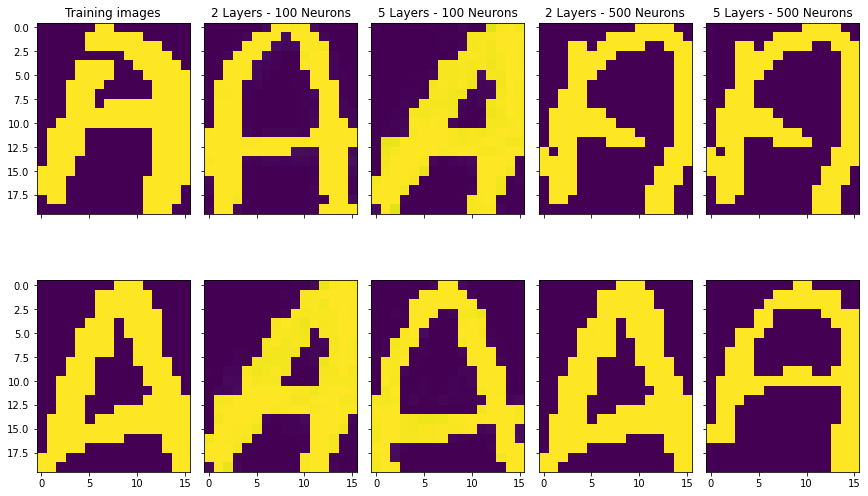

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, sharex = True, sharey = True, figsize = (12,8))

ax[0,0].imshow(X[0].view(20,16).cpu().numpy())
ax[1,0].imshow(X[10].view(20,16).cpu().numpy())
ax[0,0].set_title('Training images')

ax[0,1].imshow(images_DBN[0][0])
ax[1,1].imshow(images_DBN[0][1])
ax[0,1].set_title('2 Layers - 100 Neurons')

ax[0,2].imshow(images_DBN[1][0])
ax[1,2].imshow(images_DBN[1][1])
ax[0,2].set_title('5 Layers - 100 Neurons')

ax[0,3].imshow(images_DBN[2][0])
ax[1,3].imshow(images_DBN[2][1])
ax[0,3].set_title('2 Layers - 500 Neurons')

ax[0,4].imshow(images_DBN[3][0])
ax[1,4].imshow(images_DBN[3][1])
_ = ax[0,4].set_title('5 Layers - 500 Neurons')
plt.tight_layout()

##### Génération d'Image pour le rapport

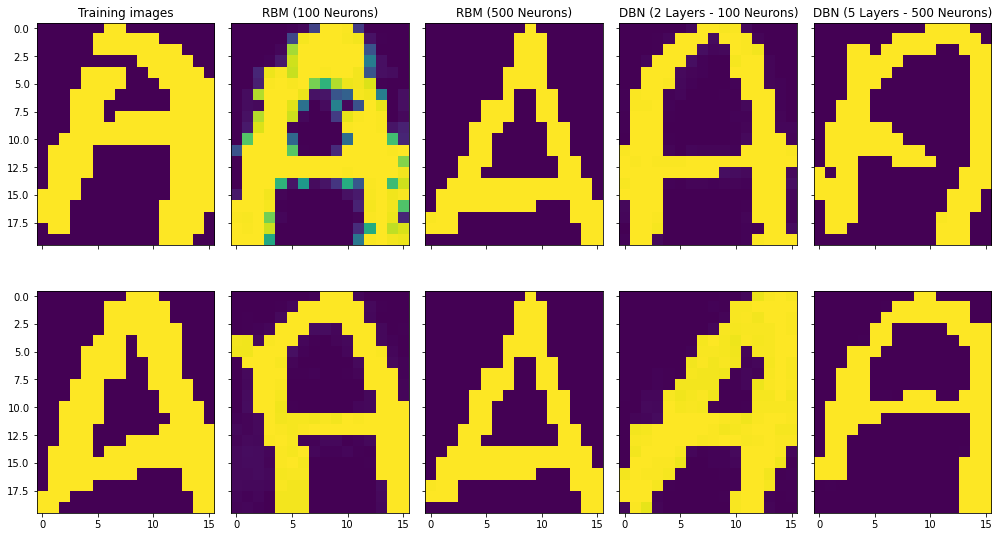

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, sharex = True, sharey = True, figsize = (14,8))

ax[0,0].imshow(X[0].view(20,16).cpu().numpy())
ax[1,0].imshow(X[10].view(20,16).cpu().numpy())
ax[0,0].set_title('Training images')

ax[0,1].imshow(images_RBM[1][0])
ax[1,1].imshow(images_RBM[1][1])
ax[0,1].set_title('RBM (100 Neurons)')

ax[0,2].imshow(images_RBM[2][0])
ax[1,2].imshow(images_RBM[2][1])
_=ax[0,2].set_title('RBM (500 Neurons)')

ax[0,3].imshow(images_DBN[0][0])
ax[1,3].imshow(images_DBN[0][1])
ax[0,3].set_title('DBN (2 Layers - 100 Neurons)')

ax[0,4].imshow(images_DBN[3][0])
ax[1,4].imshow(images_DBN[3][1])
_ = ax[0,4].set_title('DBN (5 Layers - 500 Neurons)')
plt.tight_layout()

plt.savefig('figures/image_generation_rbm_dbn.jpg', dpi=300)

### Classfication avec un DNN

Pour la classification, on considère le dataset MNIST contenant des images en $28\times28$ pixels représentant des chiffres de $0$ à $9$. On possède $60000$ images pour l'entrainement et $10000$ images pour tester la généralisation de notre modèle.

On va utiliser un DNN - un DBN contenant une couche de classification supplémentaire. On divise le jeu en jeu d'entraînement (train), validation (pour déterminer un critère d'arrêt d'entrainement) et de test. On utilisera $5\%$ du jeu d'entrainement en tant que jeu de validation pour la dernière partie consistant à trouver le meilleure jeu d'hyperparamètres.

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = lire_mnist(device = device, val_size = 0)

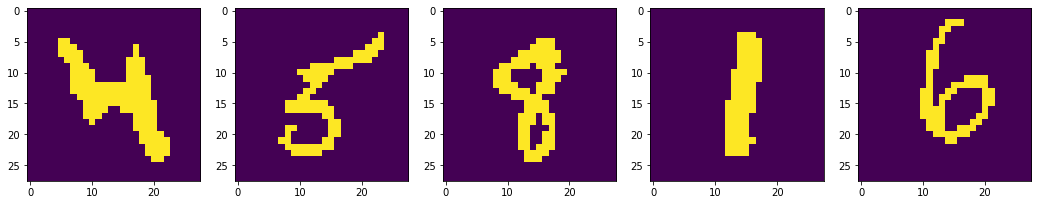

In [ ]:
fig, ax = plt.subplots(ncols = 5, nrows = 1, figsize = (18,12))

for j in range(5) : 
    ax[j].imshow(X_train[np.random.randint(X_train.size(0))].reshape(28,28).cpu().numpy())

On s'intéresse à deux types de **DNN*: 

- Un **DNN** préentrainé: on performe dans un premier temps un entrainement non supervisé de toutes les couches (hors couche de classification) du DNN de la même manière que l'on a entrainé le DBN. On entraine ensuite le **DNN** en utilisant l'alogrithme de rétropropagation.
- Un **DNN** initalisé aléatoirement, entrainé avec l'alogrithme de rétropropagation.

Dans les deux cas, les **DNN** seront initialisés avec les mêmes poids. Pour cela, on utilise le code suivant:

In [ ]:
sizes = [(10,10), (10,10)]
DNN_1 = init_DNN(len(sizes), sizes, device, random_state = 42)
DNN_2 = init_DNN(len(sizes), sizes, device, random_state = 42)

##Checking that the parameters are equal across RBMs
assertions = []
for layer in range(len(sizes)) : 
    rbm_1 = DNN_1[layer]
    rbm_2 = DNN_2[layer]
    assertions.append(torch.all( torch.isclose(rbm_1.W, rbm_2.W, atol = 1e-9)).item() )
    assertions.append(torch.all( torch.isclose(rbm_1.b, rbm_2.b, atol = 1e-9)).item() )
    assertions.append(torch.all( torch.isclose(rbm_1.a, rbm_2.a, atol = 1e-9)).item() )
    
#3 params / RBMs
n_params = len(sizes) * 3 
print(f'Number of parameters equal between RBMs: {sum(assertions)}')
print(f'Number of parameters: {n_params}')

Number of parameters equal between RBMs: 6
Number of parameters: 6


### Expérience 1

On s'intéresse a la différence entre un **DNN** préentrainé et un **DNN** initialisé aléatoirement pour une nombre fixé de neuronnes en faisant varier le nombre de couches:

In [ ]:
qs = [200, 400]
nlayers = [0, 1, 2 ,3 , 4]
epochs_retro = 200
epochs_pretrain = 100
lr = 0.1
batch_size = 512 

losses = []
accuracies_test = []
accuracies_train = []

for q in qs : 
    for n in nlayers : 
        print(f'DNN {n} layers with {q} neurons')
        sizes = [(X_train.size(1), q)]
        for j in range(n) : 
            sizes.append((q, q))
        sizes.append((q, 10))

        DNN_1 = init_DNN(len(sizes), sizes, device)
        DNN_2 = init_DNN(len(sizes), sizes, device)

        # RETRO SANS PRETRAIN #
        DNN_1, history_1 = retropropagation(X_train, y_train, DNN_1, epochs_retro, lr, batch_size)

        # RETRO AVEC PRETRAIN
        DNN_2 = pretrain_DNN(X_train, DNN_2, epochs_pretrain, lr, batch_size)
        DNN_2, history_2 = retropropagation(X_train, y_train, DNN_2, epochs_retro, lr, batch_size)
        
        accuracy_test_1 = test_DNN(X_test,y_test, DNN_1)
        accuracy_train_1 = test_DNN(X_train, y_train, DNN_1)

        accuracy_test_2 = test_DNN(X_test,y_test, DNN_2)
        accuracy_train_2 = test_DNN(X_train, y_train, DNN_2)

        losses.append((history_1, history_1))
        accuracies_train.append((accuracy_train_1, accuracy_train_2))
        accuracies_test.append((accuracy_test_1, accuracy_test_2))
        
        del DNN_1, DNN_2
        torch.cuda.empty_cache()

DNN 0 layers with 200 neurons


Epoch 200 | loss : 0.108 | accuracy  0.97: 100%|██████████| 200/200 [00:35<00:00,  5.59it/s]
EPOCH 99 - Reconstruction Error: 8.0716: 100%|██████████| 100/100 [00:31<00:00,  3.16it/s]
Epoch 200 | loss : 0.136 | accuracy  0.96: 100%|██████████| 200/200 [00:34<00:00,  5.72it/s]


DNN 1 layers with 200 neurons


Epoch 200 | loss : 0.106 | accuracy  0.97: 100%|██████████| 200/200 [00:46<00:00,  4.29it/s]
EPOCH 99 - Reconstruction Error: 2.3332: 100%|██████████| 100/100 [00:19<00:00,  5.12it/s]
Epoch 200 | loss : 0.101 | accuracy  0.97: 100%|██████████| 200/200 [00:45<00:00,  4.43it/s]


DNN 2 layers with 200 neurons


Epoch 200 | loss : 2.395 | accuracy  0.11: 100%|██████████| 200/200 [00:55<00:00,  3.60it/s]
EPOCH 99 - Reconstruction Error: 1.4964: 100%|██████████| 100/100 [00:19<00:00,  5.15it/s]
Epoch 200 | loss : 0.076 | accuracy  0.98: 100%|██████████| 200/200 [00:55<00:00,  3.60it/s]


DNN 3 layers with 200 neurons


Epoch 200 | loss : 2.402 | accuracy  0.10: 100%|██████████| 200/200 [01:06<00:00,  3.02it/s]
EPOCH 99 - Reconstruction Error: 1.0162: 100%|██████████| 100/100 [00:20<00:00,  4.99it/s]
Epoch 200 | loss : 0.062 | accuracy  0.98: 100%|██████████| 200/200 [01:07<00:00,  2.98it/s]


DNN 4 layers with 200 neurons


Epoch 200 | loss : 2.403 | accuracy  0.11: 100%|██████████| 200/200 [01:15<00:00,  2.64it/s]
EPOCH 99 - Reconstruction Error: 0.7353: 100%|██████████| 100/100 [00:19<00:00,  5.05it/s]
Epoch 200 | loss : 0.051 | accuracy  0.99: 100%|██████████| 200/200 [01:15<00:00,  2.63it/s]


DNN 0 layers with 400 neurons


Epoch 200 | loss : 0.120 | accuracy  0.97: 100%|██████████| 200/200 [00:44<00:00,  4.45it/s]
EPOCH 99 - Reconstruction Error: 3.0674: 100%|██████████| 100/100 [00:48<00:00,  2.08it/s]
Epoch 200 | loss : 0.098 | accuracy  0.97: 100%|██████████| 200/200 [00:45<00:00,  4.44it/s]


DNN 1 layers with 400 neurons


Epoch 200 | loss : 0.115 | accuracy  0.97: 100%|██████████| 200/200 [01:04<00:00,  3.08it/s]
EPOCH 99 - Reconstruction Error: 2.9975: 100%|██████████| 100/100 [00:28<00:00,  3.46it/s]
Epoch 200 | loss : 0.065 | accuracy  0.98: 100%|██████████| 200/200 [01:05<00:00,  3.06it/s]


DNN 2 layers with 400 neurons


Epoch 200 | loss : 6.557 | accuracy  0.10: 100%|██████████| 200/200 [01:24<00:00,  2.37it/s]
EPOCH 99 - Reconstruction Error: 2.4361: 100%|██████████| 100/100 [00:28<00:00,  3.47it/s]
Epoch 200 | loss : 0.054 | accuracy  0.99: 100%|██████████| 200/200 [01:24<00:00,  2.36it/s]


DNN 3 layers with 400 neurons


Epoch 200 | loss : 6.083 | accuracy  0.10: 100%|██████████| 200/200 [01:44<00:00,  1.92it/s]
EPOCH 99 - Reconstruction Error: 1.6697: 100%|██████████| 100/100 [00:28<00:00,  3.47it/s]
Epoch 200 | loss : 0.042 | accuracy  0.99: 100%|██████████| 200/200 [01:44<00:00,  1.92it/s]


DNN 4 layers with 400 neurons


Epoch 200 | loss : 6.803 | accuracy  0.10: 100%|██████████| 200/200 [02:04<00:00,  1.61it/s]
EPOCH 99 - Reconstruction Error: 1.7623: 100%|██████████| 100/100 [00:28<00:00,  3.47it/s]
Epoch 200 | loss : 0.034 | accuracy  0.99: 100%|██████████| 200/200 [02:04<00:00,  1.61it/s]


In [1]:
losses = [([2.2733192443847656, 1.9588916301727295, 1.3015817403793335, 0.9069532155990601, 0.7107968926429749, 0.6022269129753113, 0.5343433618545532, 0.48824483156204224, 0.4549177587032318, 0.4302181601524353, 0.41085055470466614, 0.3956039845943451, 0.38313591480255127, 0.3727971315383911, 0.36381983757019043, 0.356145441532135, 0.34946563839912415, 0.3432822823524475, 0.3378365635871887, 0.33284151554107666, 0.32838472723960876, 0.324044793844223, 0.3203296959400177, 0.3165653944015503, 0.31330716609954834, 0.30991458892822266, 0.30681872367858887, 0.3039930760860443, 0.3011682629585266, 0.2984882593154907, 0.295917809009552, 0.29340410232543945, 0.29099270701408386, 0.28858765959739685, 0.2863374352455139, 0.2841043770313263, 0.2817901372909546, 0.2796725928783417, 0.27763378620147705, 0.275485634803772, 0.27338355779647827, 0.27144867181777954, 0.269340842962265, 0.2675047218799591, 0.26552003622055054, 0.2635076642036438, 0.2614781856536865, 0.25967904925346375, 0.25787338614463806, 0.2559512257575989, 0.2540762424468994, 0.2522605061531067, 0.2504239082336426, 0.24859702587127686, 0.24678555130958557, 0.24510882794857025, 0.2432723194360733, 0.24155019223690033, 0.23973484337329865, 0.23811309039592743, 0.23634764552116394, 0.23479564487934113, 0.2329518049955368, 0.23144571483135223, 0.2297486960887909, 0.22814299166202545, 0.22646059095859528, 0.22494156658649445, 0.2233167439699173, 0.2218324840068817, 0.2201920449733734, 0.2187017798423767, 0.21723033487796783, 0.21581979095935822, 0.2141987383365631, 0.21264596283435822, 0.2113015204668045, 0.20990782976150513, 0.20850040018558502, 0.20698411762714386, 0.20565998554229736, 0.20415064692497253, 0.20275996625423431, 0.20156052708625793, 0.20018087327480316, 0.19892100989818573, 0.19757504761219025, 0.19622409343719482, 0.194919615983963, 0.1936846375465393, 0.19253434240818024, 0.19119545817375183, 0.18997465074062347, 0.18878234922885895, 0.18759968876838684, 0.1864229440689087, 0.18523374199867249, 0.1840793490409851, 0.18296732008457184, 0.18175163865089417, 0.18069009482860565, 0.1794738620519638, 0.1784433275461197, 0.17734964191913605, 0.1763436198234558, 0.17530310153961182, 0.1742222011089325, 0.17321820557117462, 0.17211654782295227, 0.1710626780986786, 0.1700209230184555, 0.16907301545143127, 0.1680295318365097, 0.1670563519001007, 0.1660701185464859, 0.16514421999454498, 0.16409794986248016, 0.1631445437669754, 0.16227781772613525, 0.16135843098163605, 0.16040074825286865, 0.15952281653881073, 0.1585942953824997, 0.1577666997909546, 0.15686635673046112, 0.1558874100446701, 0.1550196409225464, 0.1542167216539383, 0.15347246825695038, 0.15238431096076965, 0.15163454413414001, 0.1508723795413971, 0.15005066990852356, 0.14919854700565338, 0.14836981892585754, 0.14754998683929443, 0.1467447131872177, 0.14600132405757904, 0.14519093930721283, 0.14453007280826569, 0.14367832243442535, 0.14291207492351532, 0.14213328063488007, 0.14131496846675873, 0.14067086577415466, 0.13992944359779358, 0.13926416635513306, 0.13850447535514832, 0.1377919763326645, 0.1370116025209427, 0.13635346293449402, 0.13570129871368408, 0.1348564326763153, 0.13421349227428436, 0.13361859321594238, 0.13283564150333405, 0.13224825263023376, 0.13151343166828156, 0.13085360825061798, 0.13027942180633545, 0.12956124544143677, 0.12895169854164124, 0.12825907766819, 0.12755906581878662, 0.1269693672657013, 0.12639465928077698, 0.12580932676792145, 0.1251750886440277, 0.12454281002283096, 0.12396448105573654, 0.1233425885438919, 0.12271635234355927, 0.1222352460026741, 0.12157467007637024, 0.12107136100530624, 0.12044556438922882, 0.11993115395307541, 0.11927980184555054, 0.11880037933588028, 0.11810456216335297, 0.11759225279092789, 0.11698704212903976, 0.11651373654603958, 0.11599983274936676, 0.11538587510585785, 0.1148749515414238, 0.11436400562524796, 0.1138051450252533, 0.11320804804563522, 0.11275497823953629, 0.11224662512540817, 0.11170869320631027, 0.11123084276914597, 0.1107029989361763, 0.11022380739450455, 0.10977508127689362, 0.1092195063829422, 0.10879786312580109, 0.10829871892929077, 0.10773685574531555], [2.2733192443847656, 1.9588916301727295, 1.3015817403793335, 0.9069532155990601, 0.7107968926429749, 0.6022269129753113, 0.5343433618545532, 0.48824483156204224, 0.4549177587032318, 0.4302181601524353, 0.41085055470466614, 0.3956039845943451, 0.38313591480255127, 0.3727971315383911, 0.36381983757019043, 0.356145441532135, 0.34946563839912415, 0.3432822823524475, 0.3378365635871887, 0.33284151554107666, 0.32838472723960876, 0.324044793844223, 0.3203296959400177, 0.3165653944015503, 0.31330716609954834, 0.30991458892822266, 0.30681872367858887, 0.3039930760860443, 0.3011682629585266, 0.2984882593154907, 0.295917809009552, 0.29340410232543945, 0.29099270701408386, 0.28858765959739685, 0.2863374352455139, 0.2841043770313263, 0.2817901372909546, 0.2796725928783417, 0.27763378620147705, 0.275485634803772, 0.27338355779647827, 0.27144867181777954, 0.269340842962265, 0.2675047218799591, 0.26552003622055054, 0.2635076642036438, 0.2614781856536865, 0.25967904925346375, 0.25787338614463806, 0.2559512257575989, 0.2540762424468994, 0.2522605061531067, 0.2504239082336426, 0.24859702587127686, 0.24678555130958557, 0.24510882794857025, 0.2432723194360733, 0.24155019223690033, 0.23973484337329865, 0.23811309039592743, 0.23634764552116394, 0.23479564487934113, 0.2329518049955368, 0.23144571483135223, 0.2297486960887909, 0.22814299166202545, 0.22646059095859528, 0.22494156658649445, 0.2233167439699173, 0.2218324840068817, 0.2201920449733734, 0.2187017798423767, 0.21723033487796783, 0.21581979095935822, 0.2141987383365631, 0.21264596283435822, 0.2113015204668045, 0.20990782976150513, 0.20850040018558502, 0.20698411762714386, 0.20565998554229736, 0.20415064692497253, 0.20275996625423431, 0.20156052708625793, 0.20018087327480316, 0.19892100989818573, 0.19757504761219025, 0.19622409343719482, 0.194919615983963, 0.1936846375465393, 0.19253434240818024, 0.19119545817375183, 0.18997465074062347, 0.18878234922885895, 0.18759968876838684, 0.1864229440689087, 0.18523374199867249, 0.1840793490409851, 0.18296732008457184, 0.18175163865089417, 0.18069009482860565, 0.1794738620519638, 0.1784433275461197, 0.17734964191913605, 0.1763436198234558, 0.17530310153961182, 0.1742222011089325, 0.17321820557117462, 0.17211654782295227, 0.1710626780986786, 0.1700209230184555, 0.16907301545143127, 0.1680295318365097, 0.1670563519001007, 0.1660701185464859, 0.16514421999454498, 0.16409794986248016, 0.1631445437669754, 0.16227781772613525, 0.16135843098163605, 0.16040074825286865, 0.15952281653881073, 0.1585942953824997, 0.1577666997909546, 0.15686635673046112, 0.1558874100446701, 0.1550196409225464, 0.1542167216539383, 0.15347246825695038, 0.15238431096076965, 0.15163454413414001, 0.1508723795413971, 0.15005066990852356, 0.14919854700565338, 0.14836981892585754, 0.14754998683929443, 0.1467447131872177, 0.14600132405757904, 0.14519093930721283, 0.14453007280826569, 0.14367832243442535, 0.14291207492351532, 0.14213328063488007, 0.14131496846675873, 0.14067086577415466, 0.13992944359779358, 0.13926416635513306, 0.13850447535514832, 0.1377919763326645, 0.1370116025209427, 0.13635346293449402, 0.13570129871368408, 0.1348564326763153, 0.13421349227428436, 0.13361859321594238, 0.13283564150333405, 0.13224825263023376, 0.13151343166828156, 0.13085360825061798, 0.13027942180633545, 0.12956124544143677, 0.12895169854164124, 0.12825907766819, 0.12755906581878662, 0.1269693672657013, 0.12639465928077698, 0.12580932676792145, 0.1251750886440277, 0.12454281002283096, 0.12396448105573654, 0.1233425885438919, 0.12271635234355927, 0.1222352460026741, 0.12157467007637024, 0.12107136100530624, 0.12044556438922882, 0.11993115395307541, 0.11927980184555054, 0.11880037933588028, 0.11810456216335297, 0.11759225279092789, 0.11698704212903976, 0.11651373654603958, 0.11599983274936676, 0.11538587510585785, 0.1148749515414238, 0.11436400562524796, 0.1138051450252533, 0.11320804804563522, 0.11275497823953629, 0.11224662512540817, 0.11170869320631027, 0.11123084276914597, 0.1107029989361763, 0.11022380739450455, 0.10977508127689362, 0.1092195063829422, 0.10879786312580109, 0.10829871892929077, 0.10773685574531555]), ([2.303920269012451, 2.3042550086975098, 2.304271936416626, 2.3038341999053955, 2.3040482997894287, 2.304196834564209, 2.3043932914733887, 2.304004430770874, 2.3039567470550537, 2.3035857677459717, 2.3031556606292725, 2.303513765335083, 2.3019697666168213, 2.3014190196990967, 2.299513339996338, 2.2957992553710938, 2.28977370262146, 2.2741427421569824, 2.225253105163574, 2.054305076599121, 1.7060205936431885, 1.4522089958190918, 1.3303804397583008, 1.253312587738037, 1.1867361068725586, 1.1137511730194092, 1.0227446556091309, 0.9257057309150696, 0.8524367809295654, 0.8050888180732727, 0.7724337577819824, 0.746489942073822, 0.7246292233467102, 0.7044960260391235, 0.6862899661064148, 0.6679179668426514, 0.6502418518066406, 0.6330577731132507, 0.6164109706878662, 0.6006078720092773, 0.58588707447052, 0.5712581276893616, 0.5579988360404968, 0.5460181832313538, 0.5344078540802002, 0.5237053036689758, 0.5139733552932739, 0.504833459854126, 0.49609726667404175, 0.4875528812408447, 0.47968944907188416, 0.47182703018188477, 0.4636310040950775, 0.45629221200942993, 0.44852977991104126, 0.4411567747592926, 0.4332524240016937, 0.4252519905567169, 0.4171289801597595, 0.4091661870479584, 0.40116146206855774, 0.39315250515937805, 0.38535672426223755, 0.3778638243675232, 0.37075793743133545, 0.36390167474746704, 0.35766634345054626, 0.3517131507396698, 0.3459744453430176, 0.34086501598358154, 0.33559831976890564, 0.3307630121707916, 0.3263723850250244, 0.3220698833465576, 0.31775328516960144, 0.31386834383010864, 0.3099057972431183, 0.306108683347702, 0.30252668261528015, 0.2987149655818939, 0.29514554142951965, 0.2918015420436859, 0.28855571150779724, 0.285142183303833, 0.28195953369140625, 0.2787368893623352, 0.2756839990615845, 0.2724389135837555, 0.2696191668510437, 0.2666558623313904, 0.2637918293476105, 0.26088565587997437, 0.2578656077384949, 0.25535356998443604, 0.2523324191570282, 0.24957889318466187, 0.24684105813503265, 0.2444262057542801, 0.24170204997062683, 0.23913387954235077, 0.23666544258594513, 0.23424848914146423, 0.23178619146347046, 0.22936908900737762, 0.22683487832546234, 0.2244430035352707, 0.2224222868680954, 0.22004510462284088, 0.21789588034152985, 0.21545667946338654, 0.2133914679288864, 0.21116763353347778, 0.20892955362796783, 0.2068898230791092, 0.20512692630290985, 0.20307618379592896, 0.2011508196592331, 0.19878990948200226, 0.19718173146247864, 0.19526496529579163, 0.1935010403394699, 0.1914452314376831, 0.18998463451862335, 0.18802379071712494, 0.1863509565591812, 0.184390127658844, 0.18294095993041992, 0.18130148947238922, 0.17963269352912903, 0.17792391777038574, 0.17623689770698547, 0.1749373972415924, 0.17335020005702972, 0.17183755338191986, 0.17040744423866272, 0.1688140481710434, 0.16735553741455078, 0.1661936342716217, 0.16468948125839233, 0.16317744553089142, 0.1619507223367691, 0.1606210619211197, 0.15920361876487732, 0.15804430842399597, 0.15672390162944794, 0.1554296463727951, 0.15414723753929138, 0.15307991206645966, 0.15177683532238007, 0.15071605145931244, 0.14948873221874237, 0.1483394205570221, 0.14708738029003143, 0.14604012668132782, 0.14497089385986328, 0.14376689493656158, 0.14265692234039307, 0.1416686326265335, 0.14053186774253845, 0.13961094617843628, 0.13843552768230438, 0.13758227229118347, 0.13646838068962097, 0.13535340130329132, 0.1344151347875595, 0.13351093232631683, 0.1324857622385025, 0.13156647980213165, 0.13065944612026215, 0.1297524869441986, 0.12874960899353027, 0.12788139283657074, 0.12684838473796844, 0.1261659413576126, 0.12516823410987854, 0.12433554977178574, 0.12329011410474777, 0.1226719468832016, 0.12168517708778381, 0.1207948848605156, 0.12015441060066223, 0.1192518100142479, 0.1185106486082077, 0.11763965338468552, 0.11678631603717804, 0.11612696945667267, 0.11531468480825424, 0.11450725048780441, 0.11387066543102264, 0.11306069791316986, 0.11229602992534637, 0.1116296574473381, 0.11078431457281113, 0.11014080047607422, 0.1093873456120491, 0.10877727717161179, 0.10804703831672668, 0.10717235505580902, 0.10659482330083847, 0.10601937025785446], [2.303920269012451, 2.3042550086975098, 2.304271936416626, 2.3038341999053955, 2.3040482997894287, 2.304196834564209, 2.3043932914733887, 2.304004430770874, 2.3039567470550537, 2.3035857677459717, 2.3031556606292725, 2.303513765335083, 2.3019697666168213, 2.3014190196990967, 2.299513339996338, 2.2957992553710938, 2.28977370262146, 2.2741427421569824, 2.225253105163574, 2.054305076599121, 1.7060205936431885, 1.4522089958190918, 1.3303804397583008, 1.253312587738037, 1.1867361068725586, 1.1137511730194092, 1.0227446556091309, 0.9257057309150696, 0.8524367809295654, 0.8050888180732727, 0.7724337577819824, 0.746489942073822, 0.7246292233467102, 0.7044960260391235, 0.6862899661064148, 0.6679179668426514, 0.6502418518066406, 0.6330577731132507, 0.6164109706878662, 0.6006078720092773, 0.58588707447052, 0.5712581276893616, 0.5579988360404968, 0.5460181832313538, 0.5344078540802002, 0.5237053036689758, 0.5139733552932739, 0.504833459854126, 0.49609726667404175, 0.4875528812408447, 0.47968944907188416, 0.47182703018188477, 0.4636310040950775, 0.45629221200942993, 0.44852977991104126, 0.4411567747592926, 0.4332524240016937, 0.4252519905567169, 0.4171289801597595, 0.4091661870479584, 0.40116146206855774, 0.39315250515937805, 0.38535672426223755, 0.3778638243675232, 0.37075793743133545, 0.36390167474746704, 0.35766634345054626, 0.3517131507396698, 0.3459744453430176, 0.34086501598358154, 0.33559831976890564, 0.3307630121707916, 0.3263723850250244, 0.3220698833465576, 0.31775328516960144, 0.31386834383010864, 0.3099057972431183, 0.306108683347702, 0.30252668261528015, 0.2987149655818939, 0.29514554142951965, 0.2918015420436859, 0.28855571150779724, 0.285142183303833, 0.28195953369140625, 0.2787368893623352, 0.2756839990615845, 0.2724389135837555, 0.2696191668510437, 0.2666558623313904, 0.2637918293476105, 0.26088565587997437, 0.2578656077384949, 0.25535356998443604, 0.2523324191570282, 0.24957889318466187, 0.24684105813503265, 0.2444262057542801, 0.24170204997062683, 0.23913387954235077, 0.23666544258594513, 0.23424848914146423, 0.23178619146347046, 0.22936908900737762, 0.22683487832546234, 0.2244430035352707, 0.2224222868680954, 0.22004510462284088, 0.21789588034152985, 0.21545667946338654, 0.2133914679288864, 0.21116763353347778, 0.20892955362796783, 0.2068898230791092, 0.20512692630290985, 0.20307618379592896, 0.2011508196592331, 0.19878990948200226, 0.19718173146247864, 0.19526496529579163, 0.1935010403394699, 0.1914452314376831, 0.18998463451862335, 0.18802379071712494, 0.1863509565591812, 0.184390127658844, 0.18294095993041992, 0.18130148947238922, 0.17963269352912903, 0.17792391777038574, 0.17623689770698547, 0.1749373972415924, 0.17335020005702972, 0.17183755338191986, 0.17040744423866272, 0.1688140481710434, 0.16735553741455078, 0.1661936342716217, 0.16468948125839233, 0.16317744553089142, 0.1619507223367691, 0.1606210619211197, 0.15920361876487732, 0.15804430842399597, 0.15672390162944794, 0.1554296463727951, 0.15414723753929138, 0.15307991206645966, 0.15177683532238007, 0.15071605145931244, 0.14948873221874237, 0.1483394205570221, 0.14708738029003143, 0.14604012668132782, 0.14497089385986328, 0.14376689493656158, 0.14265692234039307, 0.1416686326265335, 0.14053186774253845, 0.13961094617843628, 0.13843552768230438, 0.13758227229118347, 0.13646838068962097, 0.13535340130329132, 0.1344151347875595, 0.13351093232631683, 0.1324857622385025, 0.13156647980213165, 0.13065944612026215, 0.1297524869441986, 0.12874960899353027, 0.12788139283657074, 0.12684838473796844, 0.1261659413576126, 0.12516823410987854, 0.12433554977178574, 0.12329011410474777, 0.1226719468832016, 0.12168517708778381, 0.1207948848605156, 0.12015441060066223, 0.1192518100142479, 0.1185106486082077, 0.11763965338468552, 0.11678631603717804, 0.11612696945667267, 0.11531468480825424, 0.11450725048780441, 0.11387066543102264, 0.11306069791316986, 0.11229602992534637, 0.1116296574473381, 0.11078431457281113, 0.11014080047607422, 0.1093873456120491, 0.10877727717161179, 0.10804703831672668, 0.10717235505580902, 0.10659482330083847, 0.10601937025785446]), ([2.303889513015747, 2.304119825363159, 2.304337501525879, 2.304171085357666, 2.3048081398010254, 2.304743766784668, 2.3044469356536865, 2.304152727127075, 2.304258346557617, 2.3045029640197754, 2.3050012588500977, 2.305063247680664, 2.3052053451538086, 2.304333209991455, 2.3049826622009277, 2.305114507675171, 2.3045356273651123, 2.3047611713409424, 2.3052258491516113, 2.3050172328948975, 2.305487632751465, 2.3052008152008057, 2.305373191833496, 2.3057947158813477, 2.3049182891845703, 2.3054590225219727, 2.305130958557129, 2.305835008621216, 2.3049476146698, 2.304934501647949, 2.3050429821014404, 2.305652141571045, 2.3057003021240234, 2.305847406387329, 2.306307792663574, 2.305741786956787, 2.3063411712646484, 2.306755304336548, 2.305422067642212, 2.306391954421997, 2.306684970855713, 2.3065383434295654, 2.3070085048675537, 2.3063976764678955, 2.3075921535491943, 2.3075408935546875, 2.307325601577759, 2.3076558113098145, 2.3080413341522217, 2.307631254196167, 2.307461738586426, 2.30773663520813, 2.3082051277160645, 2.3084521293640137, 2.3076114654541016, 2.308807373046875, 2.3079423904418945, 2.309037208557129, 2.307338237762451, 2.3088414669036865, 2.3085689544677734, 2.309321403503418, 2.308870553970337, 2.3096680641174316, 2.309002637863159, 2.309706211090088, 2.310467481613159, 2.310779094696045, 2.310180187225342, 2.310695171356201, 2.3111908435821533, 2.3123397827148438, 2.3111822605133057, 2.3118221759796143, 2.3128154277801514, 2.3127715587615967, 2.3123364448547363, 2.3126533031463623, 2.3138060569763184, 2.315992832183838, 2.31484055519104, 2.3133621215820312, 2.313591241836548, 2.3146519660949707, 2.3157389163970947, 2.3173179626464844, 2.3163774013519287, 2.3173956871032715, 2.3195719718933105, 2.3195135593414307, 2.3207130432128906, 2.319922685623169, 2.3229856491088867, 2.3234081268310547, 2.323664426803589, 2.324676513671875, 2.327633857727051, 2.3286983966827393, 2.3288328647613525, 2.3330066204071045, 2.3303067684173584, 2.335845947265625, 2.3311238288879395, 2.3377418518066406, 2.3379600048065186, 2.3427908420562744, 2.339200973510742, 2.3440582752227783, 2.34060001373291, 2.3425631523132324, 2.3453333377838135, 2.353085517883301, 2.355193614959717, 2.352922201156616, 2.357722759246826, 2.3548128604888916, 2.3599343299865723, 2.3634567260742188, 2.3677420616149902, 2.363097667694092, 2.358814001083374, 2.3634321689605713, 2.3702478408813477, 2.364335775375366, 2.3705506324768066, 2.3743438720703125, 2.3803184032440186, 2.386284112930298, 2.3673133850097656, 2.3707597255706787, 2.383260488510132, 2.376859188079834, 2.378446340560913, 2.387813091278076, 2.382441997528076, 2.3908987045288086, 2.395256280899048, 2.3931028842926025, 2.402418375015259, 2.3931515216827393, 2.3979523181915283, 2.3822357654571533, 2.3962531089782715, 2.3818752765655518, 2.3907670974731445, 2.390005350112915, 2.4050347805023193, 2.3966150283813477, 2.38944411277771, 2.390582799911499, 2.3922619819641113, 2.407528877258301, 2.392847776412964, 2.4031941890716553, 2.4015331268310547, 2.409146547317505, 2.4012298583984375, 2.403594493865967, 2.4077210426330566, 2.384310722351074, 2.4083614349365234, 2.4002039432525635, 2.3990161418914795, 2.4064791202545166, 2.41231632232666, 2.3911499977111816, 2.4069886207580566, 2.4105679988861084, 2.394014835357666, 2.4067513942718506, 2.397613048553467, 2.402837038040161, 2.3950557708740234, 2.4010040760040283, 2.393821954727173, 2.400559663772583, 2.4006693363189697, 2.3940372467041016, 2.416001558303833, 2.4066946506500244, 2.3986830711364746, 2.405000925064087, 2.406480312347412, 2.421687602996826, 2.4155006408691406, 2.4055492877960205, 2.4003264904022217, 2.4110517501831055, 2.4044265747070312, 2.396077871322632, 2.4007625579833984, 2.4000349044799805, 2.3917288780212402, 2.415109634399414, 2.402783155441284, 2.401275396347046, 2.4114372730255127, 2.4033617973327637, 2.4117302894592285, 2.395493507385254], [2.303889513015747, 2.304119825363159, 2.304337501525879, 2.304171085357666, 2.3048081398010254, 2.304743766784668, 2.3044469356536865, 2.304152727127075, 2.304258346557617, 2.3045029640197754, 2.3050012588500977, 2.305063247680664, 2.3052053451538086, 2.304333209991455, 2.3049826622009277, 2.305114507675171, 2.3045356273651123, 2.3047611713409424, 2.3052258491516113, 2.3050172328948975, 2.305487632751465, 2.3052008152008057, 2.305373191833496, 2.3057947158813477, 2.3049182891845703, 2.3054590225219727, 2.305130958557129, 2.305835008621216, 2.3049476146698, 2.304934501647949, 2.3050429821014404, 2.305652141571045, 2.3057003021240234, 2.305847406387329, 2.306307792663574, 2.305741786956787, 2.3063411712646484, 2.306755304336548, 2.305422067642212, 2.306391954421997, 2.306684970855713, 2.3065383434295654, 2.3070085048675537, 2.3063976764678955, 2.3075921535491943, 2.3075408935546875, 2.307325601577759, 2.3076558113098145, 2.3080413341522217, 2.307631254196167, 2.307461738586426, 2.30773663520813, 2.3082051277160645, 2.3084521293640137, 2.3076114654541016, 2.308807373046875, 2.3079423904418945, 2.309037208557129, 2.307338237762451, 2.3088414669036865, 2.3085689544677734, 2.309321403503418, 2.308870553970337, 2.3096680641174316, 2.309002637863159, 2.309706211090088, 2.310467481613159, 2.310779094696045, 2.310180187225342, 2.310695171356201, 2.3111908435821533, 2.3123397827148438, 2.3111822605133057, 2.3118221759796143, 2.3128154277801514, 2.3127715587615967, 2.3123364448547363, 2.3126533031463623, 2.3138060569763184, 2.315992832183838, 2.31484055519104, 2.3133621215820312, 2.313591241836548, 2.3146519660949707, 2.3157389163970947, 2.3173179626464844, 2.3163774013519287, 2.3173956871032715, 2.3195719718933105, 2.3195135593414307, 2.3207130432128906, 2.319922685623169, 2.3229856491088867, 2.3234081268310547, 2.323664426803589, 2.324676513671875, 2.327633857727051, 2.3286983966827393, 2.3288328647613525, 2.3330066204071045, 2.3303067684173584, 2.335845947265625, 2.3311238288879395, 2.3377418518066406, 2.3379600048065186, 2.3427908420562744, 2.339200973510742, 2.3440582752227783, 2.34060001373291, 2.3425631523132324, 2.3453333377838135, 2.353085517883301, 2.355193614959717, 2.352922201156616, 2.357722759246826, 2.3548128604888916, 2.3599343299865723, 2.3634567260742188, 2.3677420616149902, 2.363097667694092, 2.358814001083374, 2.3634321689605713, 2.3702478408813477, 2.364335775375366, 2.3705506324768066, 2.3743438720703125, 2.3803184032440186, 2.386284112930298, 2.3673133850097656, 2.3707597255706787, 2.383260488510132, 2.376859188079834, 2.378446340560913, 2.387813091278076, 2.382441997528076, 2.3908987045288086, 2.395256280899048, 2.3931028842926025, 2.402418375015259, 2.3931515216827393, 2.3979523181915283, 2.3822357654571533, 2.3962531089782715, 2.3818752765655518, 2.3907670974731445, 2.390005350112915, 2.4050347805023193, 2.3966150283813477, 2.38944411277771, 2.390582799911499, 2.3922619819641113, 2.407528877258301, 2.392847776412964, 2.4031941890716553, 2.4015331268310547, 2.409146547317505, 2.4012298583984375, 2.403594493865967, 2.4077210426330566, 2.384310722351074, 2.4083614349365234, 2.4002039432525635, 2.3990161418914795, 2.4064791202545166, 2.41231632232666, 2.3911499977111816, 2.4069886207580566, 2.4105679988861084, 2.394014835357666, 2.4067513942718506, 2.397613048553467, 2.402837038040161, 2.3950557708740234, 2.4010040760040283, 2.393821954727173, 2.400559663772583, 2.4006693363189697, 2.3940372467041016, 2.416001558303833, 2.4066946506500244, 2.3986830711364746, 2.405000925064087, 2.406480312347412, 2.421687602996826, 2.4155006408691406, 2.4055492877960205, 2.4003264904022217, 2.4110517501831055, 2.4044265747070312, 2.396077871322632, 2.4007625579833984, 2.4000349044799805, 2.3917288780212402, 2.415109634399414, 2.402783155441284, 2.401275396347046, 2.4114372730255127, 2.4033617973327637, 2.4117302894592285, 2.395493507385254]), ([2.304103374481201, 2.3043100833892822, 2.3043038845062256, 2.3048322200775146, 2.3041810989379883, 2.304936170578003, 2.304349184036255, 2.3047385215759277, 2.3046159744262695, 2.3042988777160645, 2.3049874305725098, 2.3050034046173096, 2.3046326637268066, 2.3044371604919434, 2.304929494857788, 2.304971694946289, 2.3053524494171143, 2.3052947521209717, 2.304889440536499, 2.3051719665527344, 2.3051342964172363, 2.304955005645752, 2.304858922958374, 2.304945707321167, 2.3049428462982178, 2.3051886558532715, 2.3057312965393066, 2.305781602859497, 2.3054885864257812, 2.305379629135132, 2.3056833744049072, 2.3068978786468506, 2.3055760860443115, 2.3057994842529297, 2.3066725730895996, 2.306199550628662, 2.305718421936035, 2.3061578273773193, 2.306588649749756, 2.3059091567993164, 2.306037187576294, 2.3061115741729736, 2.3063647747039795, 2.3068156242370605, 2.3073372840881348, 2.307018995285034, 2.3066465854644775, 2.3073923587799072, 2.306626558303833, 2.3073537349700928, 2.3067069053649902, 2.307398796081543, 2.3078341484069824, 2.3076093196868896, 2.3081490993499756, 2.30820369720459, 2.3090317249298096, 2.308701992034912, 2.3085849285125732, 2.308919906616211, 2.310147523880005, 2.3090884685516357, 2.309006452560425, 2.309540033340454, 2.309023141860962, 2.309752941131592, 2.3100273609161377, 2.31122088432312, 2.3093695640563965, 2.3106188774108887, 2.310424327850342, 2.3099584579467773, 2.3115735054016113, 2.3115828037261963, 2.3098196983337402, 2.311908721923828, 2.3126745223999023, 2.3129591941833496, 2.3124098777770996, 2.314100503921509, 2.3125312328338623, 2.313253879547119, 2.3143041133880615, 2.315088987350464, 2.3171162605285645, 2.314850330352783, 2.3171331882476807, 2.318390130996704, 2.3171350955963135, 2.321284055709839, 2.318586826324463, 2.321864128112793, 2.3215479850769043, 2.321249485015869, 2.3233160972595215, 2.32560658454895, 2.3285555839538574, 2.3267059326171875, 2.328019142150879, 2.3271820545196533, 2.330132007598877, 2.3277909755706787, 2.3307013511657715, 2.3361592292785645, 2.3388779163360596, 2.3391833305358887, 2.340745687484741, 2.343690872192383, 2.343204975128174, 2.347451686859131, 2.3437163829803467, 2.347621440887451, 2.353062868118286, 2.3559746742248535, 2.351484775543213, 2.3600122928619385, 2.35728120803833, 2.3667490482330322, 2.3638577461242676, 2.365057945251465, 2.3640050888061523, 2.374864339828491, 2.3585617542266846, 2.368659257888794, 2.3709616661071777, 2.389753818511963, 2.3765876293182373, 2.371434450149536, 2.3820760250091553, 2.3825020790100098, 2.3838913440704346, 2.398322105407715, 2.3876373767852783, 2.3814399242401123, 2.3864336013793945, 2.395747423171997, 2.380525827407837, 2.3852717876434326, 2.3863210678100586, 2.3838653564453125, 2.4042060375213623, 2.3939638137817383, 2.3873820304870605, 2.38875675201416, 2.395660400390625, 2.4060349464416504, 2.3996307849884033, 2.385956287384033, 2.4030120372772217, 2.403893232345581, 2.3988025188446045, 2.396867275238037, 2.3970983028411865, 2.3922975063323975, 2.409187078475952, 2.394596815109253, 2.4019904136657715, 2.4019012451171875, 2.4050087928771973, 2.405766725540161, 2.40096378326416, 2.3996689319610596, 2.395204544067383, 2.3979125022888184, 2.3913142681121826, 2.3955698013305664, 2.396266460418701, 2.4027469158172607, 2.400674819946289, 2.404365062713623, 2.401481866836548, 2.407072067260742, 2.3981399536132812, 2.3975095748901367, 2.414456844329834, 2.4028964042663574, 2.3986270427703857, 2.3962931632995605, 2.4035768508911133, 2.4169609546661377, 2.4145429134368896, 2.4166765213012695, 2.391627550125122, 2.3952128887176514, 2.4025628566741943, 2.399888515472412, 2.412177085876465, 2.404007911682129, 2.400083065032959, 2.41033935546875, 2.4057159423828125, 2.4133894443511963, 2.4059925079345703, 2.409484386444092, 2.413127899169922, 2.4144845008850098, 2.4133005142211914, 2.3966171741485596, 2.4016993045806885, 2.4023423194885254], [2.304103374481201, 2.3043100833892822, 2.3043038845062256, 2.3048322200775146, 2.3041810989379883, 2.304936170578003, 2.304349184036255, 2.3047385215759277, 2.3046159744262695, 2.3042988777160645, 2.3049874305725098, 2.3050034046173096, 2.3046326637268066, 2.3044371604919434, 2.304929494857788, 2.304971694946289, 2.3053524494171143, 2.3052947521209717, 2.304889440536499, 2.3051719665527344, 2.3051342964172363, 2.304955005645752, 2.304858922958374, 2.304945707321167, 2.3049428462982178, 2.3051886558532715, 2.3057312965393066, 2.305781602859497, 2.3054885864257812, 2.305379629135132, 2.3056833744049072, 2.3068978786468506, 2.3055760860443115, 2.3057994842529297, 2.3066725730895996, 2.306199550628662, 2.305718421936035, 2.3061578273773193, 2.306588649749756, 2.3059091567993164, 2.306037187576294, 2.3061115741729736, 2.3063647747039795, 2.3068156242370605, 2.3073372840881348, 2.307018995285034, 2.3066465854644775, 2.3073923587799072, 2.306626558303833, 2.3073537349700928, 2.3067069053649902, 2.307398796081543, 2.3078341484069824, 2.3076093196868896, 2.3081490993499756, 2.30820369720459, 2.3090317249298096, 2.308701992034912, 2.3085849285125732, 2.308919906616211, 2.310147523880005, 2.3090884685516357, 2.309006452560425, 2.309540033340454, 2.309023141860962, 2.309752941131592, 2.3100273609161377, 2.31122088432312, 2.3093695640563965, 2.3106188774108887, 2.310424327850342, 2.3099584579467773, 2.3115735054016113, 2.3115828037261963, 2.3098196983337402, 2.311908721923828, 2.3126745223999023, 2.3129591941833496, 2.3124098777770996, 2.314100503921509, 2.3125312328338623, 2.313253879547119, 2.3143041133880615, 2.315088987350464, 2.3171162605285645, 2.314850330352783, 2.3171331882476807, 2.318390130996704, 2.3171350955963135, 2.321284055709839, 2.318586826324463, 2.321864128112793, 2.3215479850769043, 2.321249485015869, 2.3233160972595215, 2.32560658454895, 2.3285555839538574, 2.3267059326171875, 2.328019142150879, 2.3271820545196533, 2.330132007598877, 2.3277909755706787, 2.3307013511657715, 2.3361592292785645, 2.3388779163360596, 2.3391833305358887, 2.340745687484741, 2.343690872192383, 2.343204975128174, 2.347451686859131, 2.3437163829803467, 2.347621440887451, 2.353062868118286, 2.3559746742248535, 2.351484775543213, 2.3600122928619385, 2.35728120803833, 2.3667490482330322, 2.3638577461242676, 2.365057945251465, 2.3640050888061523, 2.374864339828491, 2.3585617542266846, 2.368659257888794, 2.3709616661071777, 2.389753818511963, 2.3765876293182373, 2.371434450149536, 2.3820760250091553, 2.3825020790100098, 2.3838913440704346, 2.398322105407715, 2.3876373767852783, 2.3814399242401123, 2.3864336013793945, 2.395747423171997, 2.380525827407837, 2.3852717876434326, 2.3863210678100586, 2.3838653564453125, 2.4042060375213623, 2.3939638137817383, 2.3873820304870605, 2.38875675201416, 2.395660400390625, 2.4060349464416504, 2.3996307849884033, 2.385956287384033, 2.4030120372772217, 2.403893232345581, 2.3988025188446045, 2.396867275238037, 2.3970983028411865, 2.3922975063323975, 2.409187078475952, 2.394596815109253, 2.4019904136657715, 2.4019012451171875, 2.4050087928771973, 2.405766725540161, 2.40096378326416, 2.3996689319610596, 2.395204544067383, 2.3979125022888184, 2.3913142681121826, 2.3955698013305664, 2.396266460418701, 2.4027469158172607, 2.400674819946289, 2.404365062713623, 2.401481866836548, 2.407072067260742, 2.3981399536132812, 2.3975095748901367, 2.414456844329834, 2.4028964042663574, 2.3986270427703857, 2.3962931632995605, 2.4035768508911133, 2.4169609546661377, 2.4145429134368896, 2.4166765213012695, 2.391627550125122, 2.3952128887176514, 2.4025628566741943, 2.399888515472412, 2.412177085876465, 2.404007911682129, 2.400083065032959, 2.41033935546875, 2.4057159423828125, 2.4133894443511963, 2.4059925079345703, 2.409484386444092, 2.413127899169922, 2.4144845008850098, 2.4133005142211914, 2.3966171741485596, 2.4016993045806885, 2.4023423194885254]), ([2.304790735244751, 2.3041529655456543, 2.3049168586730957, 2.3045642375946045, 2.3042759895324707, 2.304388999938965, 2.3044395446777344, 2.3043482303619385, 2.3046743869781494, 2.3045530319213867, 2.3046135902404785, 2.3044650554656982, 2.305109739303589, 2.304945945739746, 2.3046672344207764, 2.304520845413208, 2.30460524559021, 2.304832935333252, 2.305514097213745, 2.304960250854492, 2.30530047416687, 2.304914951324463, 2.3050575256347656, 2.305121898651123, 2.30546236038208, 2.305433988571167, 2.305264711380005, 2.3052430152893066, 2.3061561584472656, 2.305072069168091, 2.3059091567993164, 2.305800437927246, 2.3054041862487793, 2.3057711124420166, 2.30522084236145, 2.306313991546631, 2.3061697483062744, 2.305814027786255, 2.3063290119171143, 2.306227922439575, 2.3063716888427734, 2.306462526321411, 2.307492971420288, 2.3068346977233887, 2.306549549102783, 2.3064587116241455, 2.3068132400512695, 2.307443857192993, 2.307072162628174, 2.307082414627075, 2.308180809020996, 2.308150053024292, 2.3077635765075684, 2.30731463432312, 2.308224678039551, 2.30814266204834, 2.3081796169281006, 2.3085031509399414, 2.3083081245422363, 2.308865547180176, 2.3087539672851562, 2.309121608734131, 2.3090765476226807, 2.309882879257202, 2.3086225986480713, 2.3098907470703125, 2.310056209564209, 2.3094146251678467, 2.3115108013153076, 2.3097269535064697, 2.311117649078369, 2.3114945888519287, 2.3111867904663086, 2.311485767364502, 2.3130455017089844, 2.3120944499969482, 2.3133418560028076, 2.3130428791046143, 2.312915802001953, 2.3144407272338867, 2.3133983612060547, 2.314460039138794, 2.3143081665039062, 2.31365704536438, 2.3144443035125732, 2.317650318145752, 2.315678358078003, 2.31707501411438, 2.3199453353881836, 2.319183111190796, 2.319708824157715, 2.3219034671783447, 2.3187832832336426, 2.323143243789673, 2.3219447135925293, 2.3253259658813477, 2.32464337348938, 2.3247783184051514, 2.324920892715454, 2.326720952987671, 2.3295347690582275, 2.3320400714874268, 2.3288722038269043, 2.3346331119537354, 2.3340790271759033, 2.3377363681793213, 2.3394927978515625, 2.338895559310913, 2.3352649211883545, 2.3471171855926514, 2.3479771614074707, 2.3426733016967773, 2.3538148403167725, 2.3491313457489014, 2.3541014194488525, 2.360407590866089, 2.3609812259674072, 2.3712756633758545, 2.371084451675415, 2.3575592041015625, 2.362718343734741, 2.368917942047119, 2.3865771293640137, 2.385002613067627, 2.3754701614379883, 2.3701226711273193, 2.3717777729034424, 2.375107765197754, 2.3768019676208496, 2.3749873638153076, 2.3827219009399414, 2.37872052192688, 2.3773560523986816, 2.3903701305389404, 2.3795053958892822, 2.4000611305236816, 2.3779137134552, 2.3917272090911865, 2.3790206909179688, 2.3864128589630127, 2.394700288772583, 2.396219491958618, 2.401806116104126, 2.393223524093628, 2.3889424800872803, 2.3936562538146973, 2.392430067062378, 2.395437002182007, 2.4034264087677, 2.3921356201171875, 2.390110731124878, 2.4083731174468994, 2.3916568756103516, 2.407527446746826, 2.40043044090271, 2.39792799949646, 2.407294988632202, 2.391174554824829, 2.404308557510376, 2.413490056991577, 2.4023866653442383, 2.3910722732543945, 2.400641441345215, 2.3988842964172363, 2.3946938514709473, 2.3999202251434326, 2.4084105491638184, 2.4057490825653076, 2.3900206089019775, 2.412540912628174, 2.398808717727661, 2.4018983840942383, 2.4003169536590576, 2.407465934753418, 2.4038145542144775, 2.3935656547546387, 2.4109132289886475, 2.404104709625244, 2.407453775405884, 2.391840934753418, 2.3952796459198, 2.4083659648895264, 2.408766269683838, 2.408957004547119, 2.4142677783966064, 2.4037551879882812, 2.4100241661071777, 2.4185261726379395, 2.4195754528045654, 2.41037654876709, 2.40440034866333, 2.3953514099121094, 2.406558036804199, 2.406946897506714, 2.405380964279175, 2.398441791534424, 2.413843870162964, 2.4106967449188232, 2.398019552230835, 2.4034836292266846], [2.304790735244751, 2.3041529655456543, 2.3049168586730957, 2.3045642375946045, 2.3042759895324707, 2.304388999938965, 2.3044395446777344, 2.3043482303619385, 2.3046743869781494, 2.3045530319213867, 2.3046135902404785, 2.3044650554656982, 2.305109739303589, 2.304945945739746, 2.3046672344207764, 2.304520845413208, 2.30460524559021, 2.304832935333252, 2.305514097213745, 2.304960250854492, 2.30530047416687, 2.304914951324463, 2.3050575256347656, 2.305121898651123, 2.30546236038208, 2.305433988571167, 2.305264711380005, 2.3052430152893066, 2.3061561584472656, 2.305072069168091, 2.3059091567993164, 2.305800437927246, 2.3054041862487793, 2.3057711124420166, 2.30522084236145, 2.306313991546631, 2.3061697483062744, 2.305814027786255, 2.3063290119171143, 2.306227922439575, 2.3063716888427734, 2.306462526321411, 2.307492971420288, 2.3068346977233887, 2.306549549102783, 2.3064587116241455, 2.3068132400512695, 2.307443857192993, 2.307072162628174, 2.307082414627075, 2.308180809020996, 2.308150053024292, 2.3077635765075684, 2.30731463432312, 2.308224678039551, 2.30814266204834, 2.3081796169281006, 2.3085031509399414, 2.3083081245422363, 2.308865547180176, 2.3087539672851562, 2.309121608734131, 2.3090765476226807, 2.309882879257202, 2.3086225986480713, 2.3098907470703125, 2.310056209564209, 2.3094146251678467, 2.3115108013153076, 2.3097269535064697, 2.311117649078369, 2.3114945888519287, 2.3111867904663086, 2.311485767364502, 2.3130455017089844, 2.3120944499969482, 2.3133418560028076, 2.3130428791046143, 2.312915802001953, 2.3144407272338867, 2.3133983612060547, 2.314460039138794, 2.3143081665039062, 2.31365704536438, 2.3144443035125732, 2.317650318145752, 2.315678358078003, 2.31707501411438, 2.3199453353881836, 2.319183111190796, 2.319708824157715, 2.3219034671783447, 2.3187832832336426, 2.323143243789673, 2.3219447135925293, 2.3253259658813477, 2.32464337348938, 2.3247783184051514, 2.324920892715454, 2.326720952987671, 2.3295347690582275, 2.3320400714874268, 2.3288722038269043, 2.3346331119537354, 2.3340790271759033, 2.3377363681793213, 2.3394927978515625, 2.338895559310913, 2.3352649211883545, 2.3471171855926514, 2.3479771614074707, 2.3426733016967773, 2.3538148403167725, 2.3491313457489014, 2.3541014194488525, 2.360407590866089, 2.3609812259674072, 2.3712756633758545, 2.371084451675415, 2.3575592041015625, 2.362718343734741, 2.368917942047119, 2.3865771293640137, 2.385002613067627, 2.3754701614379883, 2.3701226711273193, 2.3717777729034424, 2.375107765197754, 2.3768019676208496, 2.3749873638153076, 2.3827219009399414, 2.37872052192688, 2.3773560523986816, 2.3903701305389404, 2.3795053958892822, 2.4000611305236816, 2.3779137134552, 2.3917272090911865, 2.3790206909179688, 2.3864128589630127, 2.394700288772583, 2.396219491958618, 2.401806116104126, 2.393223524093628, 2.3889424800872803, 2.3936562538146973, 2.392430067062378, 2.395437002182007, 2.4034264087677, 2.3921356201171875, 2.390110731124878, 2.4083731174468994, 2.3916568756103516, 2.407527446746826, 2.40043044090271, 2.39792799949646, 2.407294988632202, 2.391174554824829, 2.404308557510376, 2.413490056991577, 2.4023866653442383, 2.3910722732543945, 2.400641441345215, 2.3988842964172363, 2.3946938514709473, 2.3999202251434326, 2.4084105491638184, 2.4057490825653076, 2.3900206089019775, 2.412540912628174, 2.398808717727661, 2.4018983840942383, 2.4003169536590576, 2.407465934753418, 2.4038145542144775, 2.3935656547546387, 2.4109132289886475, 2.404104709625244, 2.407453775405884, 2.391840934753418, 2.3952796459198, 2.4083659648895264, 2.408766269683838, 2.408957004547119, 2.4142677783966064, 2.4037551879882812, 2.4100241661071777, 2.4185261726379395, 2.4195754528045654, 2.41037654876709, 2.40440034866333, 2.3953514099121094, 2.406558036804199, 2.406946897506714, 2.405380964279175, 2.398441791534424, 2.413843870162964, 2.4106967449188232, 2.398019552230835, 2.4034836292266846]), ([2.2506678104400635, 1.7900933027267456, 1.1283248662948608, 0.7992542386054993, 0.6431828737258911, 0.5562666058540344, 0.5019451975822449, 0.4640427529811859, 0.4371851086616516, 0.41694387793540955, 0.40097081661224365, 0.38799262046813965, 0.3774341940879822, 0.3687025010585785, 0.36114150285720825, 0.35438504815101624, 0.34856006503105164, 0.3432665467262268, 0.33872079849243164, 0.33464547991752625, 0.3306998610496521, 0.3273053467273712, 0.3239039182662964, 0.32099980115890503, 0.31840139627456665, 0.31544798612594604, 0.31305551528930664, 0.31068775057792664, 0.30853572487831116, 0.30619117617607117, 0.30422013998031616, 0.3021804690361023, 0.3005904257297516, 0.29869920015335083, 0.29693207144737244, 0.29507920145988464, 0.2934454679489136, 0.29173851013183594, 0.2901240587234497, 0.2886285185813904, 0.28720521926879883, 0.28563234210014343, 0.28395798802375793, 0.28236469626426697, 0.2811583876609802, 0.2796838581562042, 0.2779335677623749, 0.27668267488479614, 0.2750033438205719, 0.27378228306770325, 0.27220791578292847, 0.2707388699054718, 0.2694553732872009, 0.2679421603679657, 0.26660218834877014, 0.2650950253009796, 0.2636145055294037, 0.2619892656803131, 0.26064378023147583, 0.25921598076820374, 0.25766414403915405, 0.25628671050071716, 0.254739373922348, 0.25327008962631226, 0.2517477869987488, 0.2506643235683441, 0.24904146790504456, 0.2475503385066986, 0.24611522257328033, 0.2446761578321457, 0.24321821331977844, 0.2417176514863968, 0.2403072565793991, 0.23874562978744507, 0.23736368119716644, 0.2358647584915161, 0.23459787666797638, 0.23321326076984406, 0.23187564313411713, 0.23039934039115906, 0.22894984483718872, 0.2275390923023224, 0.22633227705955505, 0.2248665988445282, 0.22351306676864624, 0.22222529351711273, 0.22059234976768494, 0.21947427093982697, 0.21788644790649414, 0.21681815385818481, 0.21541085839271545, 0.21412019431591034, 0.21302343904972076, 0.21157404780387878, 0.21015802025794983, 0.20908679068088531, 0.20763787627220154, 0.20648983120918274, 0.20521661639213562, 0.20403943955898285, 0.20278874039649963, 0.20145279169082642, 0.2005130499601364, 0.19912666082382202, 0.19795775413513184, 0.19688163697719574, 0.19564008712768555, 0.19440138339996338, 0.19337350130081177, 0.19216066598892212, 0.19105760753154755, 0.19000667333602905, 0.18882176280021667, 0.18768134713172913, 0.18675833940505981, 0.18568861484527588, 0.18457411229610443, 0.18349140882492065, 0.18250542879104614, 0.1814878135919571, 0.18041172623634338, 0.1792924404144287, 0.17841196060180664, 0.1773001104593277, 0.17625992000102997, 0.1753716915845871, 0.17434264719486237, 0.173441082239151, 0.1723669022321701, 0.1714932918548584, 0.1704736202955246, 0.16955657303333282, 0.16857093572616577, 0.1677766591310501, 0.16663306951522827, 0.16585460305213928, 0.16502130031585693, 0.16414423286914825, 0.16312702000141144, 0.16223250329494476, 0.16140463948249817, 0.16049954295158386, 0.15961889922618866, 0.15887893736362457, 0.15788845717906952, 0.1570919007062912, 0.15618443489074707, 0.15544261038303375, 0.15460938215255737, 0.1537722796201706, 0.15307220816612244, 0.1521957963705063, 0.15140527486801147, 0.1506325900554657, 0.14985278248786926, 0.14905795454978943, 0.14827385544776917, 0.1475210040807724, 0.1468491554260254, 0.14607968926429749, 0.14520373940467834, 0.1445748209953308, 0.1438337117433548, 0.14312776923179626, 0.14236396551132202, 0.14161571860313416, 0.14094053208827972, 0.14021119475364685, 0.1395566463470459, 0.13878853619098663, 0.13801638782024384, 0.13753151893615723, 0.13671855628490448, 0.13601411879062653, 0.1354474127292633, 0.134774848818779, 0.1341235339641571, 0.133344367146492, 0.13274721801280975, 0.1321738213300705, 0.13149729371070862, 0.1308511346578598, 0.13022363185882568, 0.12959223985671997, 0.128879576921463, 0.12831208109855652, 0.1277097910642624, 0.1271333247423172, 0.12656885385513306, 0.1259090155363083, 0.12541607022285461, 0.12470985949039459, 0.12410353869199753, 0.12351624667644501, 0.12303020805120468, 0.12240287661552429, 0.12186062335968018, 0.12121334671974182, 0.12077917158603668, 0.12011964619159698], [2.2506678104400635, 1.7900933027267456, 1.1283248662948608, 0.7992542386054993, 0.6431828737258911, 0.5562666058540344, 0.5019451975822449, 0.4640427529811859, 0.4371851086616516, 0.41694387793540955, 0.40097081661224365, 0.38799262046813965, 0.3774341940879822, 0.3687025010585785, 0.36114150285720825, 0.35438504815101624, 0.34856006503105164, 0.3432665467262268, 0.33872079849243164, 0.33464547991752625, 0.3306998610496521, 0.3273053467273712, 0.3239039182662964, 0.32099980115890503, 0.31840139627456665, 0.31544798612594604, 0.31305551528930664, 0.31068775057792664, 0.30853572487831116, 0.30619117617607117, 0.30422013998031616, 0.3021804690361023, 0.3005904257297516, 0.29869920015335083, 0.29693207144737244, 0.29507920145988464, 0.2934454679489136, 0.29173851013183594, 0.2901240587234497, 0.2886285185813904, 0.28720521926879883, 0.28563234210014343, 0.28395798802375793, 0.28236469626426697, 0.2811583876609802, 0.2796838581562042, 0.2779335677623749, 0.27668267488479614, 0.2750033438205719, 0.27378228306770325, 0.27220791578292847, 0.2707388699054718, 0.2694553732872009, 0.2679421603679657, 0.26660218834877014, 0.2650950253009796, 0.2636145055294037, 0.2619892656803131, 0.26064378023147583, 0.25921598076820374, 0.25766414403915405, 0.25628671050071716, 0.254739373922348, 0.25327008962631226, 0.2517477869987488, 0.2506643235683441, 0.24904146790504456, 0.2475503385066986, 0.24611522257328033, 0.2446761578321457, 0.24321821331977844, 0.2417176514863968, 0.2403072565793991, 0.23874562978744507, 0.23736368119716644, 0.2358647584915161, 0.23459787666797638, 0.23321326076984406, 0.23187564313411713, 0.23039934039115906, 0.22894984483718872, 0.2275390923023224, 0.22633227705955505, 0.2248665988445282, 0.22351306676864624, 0.22222529351711273, 0.22059234976768494, 0.21947427093982697, 0.21788644790649414, 0.21681815385818481, 0.21541085839271545, 0.21412019431591034, 0.21302343904972076, 0.21157404780387878, 0.21015802025794983, 0.20908679068088531, 0.20763787627220154, 0.20648983120918274, 0.20521661639213562, 0.20403943955898285, 0.20278874039649963, 0.20145279169082642, 0.2005130499601364, 0.19912666082382202, 0.19795775413513184, 0.19688163697719574, 0.19564008712768555, 0.19440138339996338, 0.19337350130081177, 0.19216066598892212, 0.19105760753154755, 0.19000667333602905, 0.18882176280021667, 0.18768134713172913, 0.18675833940505981, 0.18568861484527588, 0.18457411229610443, 0.18349140882492065, 0.18250542879104614, 0.1814878135919571, 0.18041172623634338, 0.1792924404144287, 0.17841196060180664, 0.1773001104593277, 0.17625992000102997, 0.1753716915845871, 0.17434264719486237, 0.173441082239151, 0.1723669022321701, 0.1714932918548584, 0.1704736202955246, 0.16955657303333282, 0.16857093572616577, 0.1677766591310501, 0.16663306951522827, 0.16585460305213928, 0.16502130031585693, 0.16414423286914825, 0.16312702000141144, 0.16223250329494476, 0.16140463948249817, 0.16049954295158386, 0.15961889922618866, 0.15887893736362457, 0.15788845717906952, 0.1570919007062912, 0.15618443489074707, 0.15544261038303375, 0.15460938215255737, 0.1537722796201706, 0.15307220816612244, 0.1521957963705063, 0.15140527486801147, 0.1506325900554657, 0.14985278248786926, 0.14905795454978943, 0.14827385544776917, 0.1475210040807724, 0.1468491554260254, 0.14607968926429749, 0.14520373940467834, 0.1445748209953308, 0.1438337117433548, 0.14312776923179626, 0.14236396551132202, 0.14161571860313416, 0.14094053208827972, 0.14021119475364685, 0.1395566463470459, 0.13878853619098663, 0.13801638782024384, 0.13753151893615723, 0.13671855628490448, 0.13601411879062653, 0.1354474127292633, 0.134774848818779, 0.1341235339641571, 0.133344367146492, 0.13274721801280975, 0.1321738213300705, 0.13149729371070862, 0.1308511346578598, 0.13022363185882568, 0.12959223985671997, 0.128879576921463, 0.12831208109855652, 0.1277097910642624, 0.1271333247423172, 0.12656885385513306, 0.1259090155363083, 0.12541607022285461, 0.12470985949039459, 0.12410353869199753, 0.12351624667644501, 0.12303020805120468, 0.12240287661552429, 0.12186062335968018, 0.12121334671974182, 0.12077917158603668, 0.12011964619159698]), ([2.3102006912231445, 2.309440851211548, 2.3114538192749023, 2.3129220008850098, 2.3121726512908936, 2.3140709400177, 2.314378499984741, 2.313760995864868, 2.3141300678253174, 2.3138153553009033, 2.3074231147766113, 2.2965686321258545, 2.2574172019958496, 2.1080894470214844, 1.8275063037872314, 1.5602060556411743, 1.3602097034454346, 1.1967589855194092, 1.0340442657470703, 0.9200624823570251, 0.8491960167884827, 0.8027803301811218, 0.7688683271408081, 0.7408438324928284, 0.715338945388794, 0.6898856163024902, 0.664081335067749, 0.6391266584396362, 0.617232084274292, 0.5959455370903015, 0.5793249011039734, 0.5643280744552612, 0.5523629188537598, 0.5419474244117737, 0.5314815640449524, 0.5216515064239502, 0.5132864117622375, 0.5042479634284973, 0.4959050416946411, 0.4871141314506531, 0.4777801036834717, 0.4684642255306244, 0.4589937627315521, 0.4493846297264099, 0.44002193212509155, 0.4315440058708191, 0.4232107698917389, 0.4156914949417114, 0.4093216061592102, 0.40366411209106445, 0.3982698619365692, 0.39315077662467957, 0.38865482807159424, 0.3838105797767639, 0.3798624277114868, 0.3757826089859009, 0.372193843126297, 0.36847200989723206, 0.3651781678199768, 0.3613090515136719, 0.35792067646980286, 0.3542831540107727, 0.35169073939323425, 0.3479151129722595, 0.34474703669548035, 0.34163087606430054, 0.3389317989349365, 0.33576181530952454, 0.3324856758117676, 0.32995492219924927, 0.32701173424720764, 0.32417362928390503, 0.32166656851768494, 0.3188530206680298, 0.3162085711956024, 0.31359273195266724, 0.31099820137023926, 0.30844366550445557, 0.30598148703575134, 0.30327266454696655, 0.30064815282821655, 0.29809078574180603, 0.2959008514881134, 0.29323437809944153, 0.29057782888412476, 0.28773233294487, 0.2854444086551666, 0.28313830494880676, 0.28060197830200195, 0.27810704708099365, 0.2757999300956726, 0.27291378378868103, 0.27024197578430176, 0.2678980231285095, 0.2656579911708832, 0.26312994956970215, 0.2606671154499054, 0.25788024067878723, 0.2557244598865509, 0.2533533573150635, 0.2506241202354431, 0.248221293091774, 0.24583831429481506, 0.24334324896335602, 0.24114198982715607, 0.2389460653066635, 0.2363206297159195, 0.2342952936887741, 0.23210658133029938, 0.2299738973379135, 0.22766438126564026, 0.22539536654949188, 0.22316281497478485, 0.22075124084949493, 0.21862658858299255, 0.21693837642669678, 0.21479716897010803, 0.2129361480474472, 0.2107795774936676, 0.208652526140213, 0.20690640807151794, 0.2047010213136673, 0.2029975950717926, 0.2012617141008377, 0.19959791004657745, 0.19756485521793365, 0.1958559900522232, 0.1938987821340561, 0.19234296679496765, 0.19063475728034973, 0.18901513516902924, 0.18750061094760895, 0.18582500517368317, 0.18421322107315063, 0.18282032012939453, 0.18131625652313232, 0.17961110174655914, 0.17830801010131836, 0.17652283608913422, 0.17526793479919434, 0.1739485114812851, 0.17240644991397858, 0.17117218673229218, 0.16977213323116302, 0.16830961406230927, 0.16683197021484375, 0.16578634083271027, 0.16457414627075195, 0.16330045461654663, 0.16226500272750854, 0.16062870621681213, 0.15960687398910522, 0.15836137533187866, 0.15715472400188446, 0.15606795251369476, 0.1548600047826767, 0.15359266102313995, 0.1526108682155609, 0.15136758983135223, 0.15024642646312714, 0.1490858793258667, 0.14842438697814941, 0.14709146320819855, 0.14622263610363007, 0.14485588669776917, 0.14387023448944092, 0.14300796389579773, 0.14195896685123444, 0.14082349836826324, 0.14004690945148468, 0.1391996443271637, 0.13817757368087769, 0.1370500922203064, 0.13612429797649384, 0.13504868745803833, 0.13442018628120422, 0.13359080255031586, 0.13273626565933228, 0.13172650337219238, 0.13051281869411469, 0.1298852115869522, 0.1290963739156723, 0.12820059061050415, 0.12755705416202545, 0.12660223245620728, 0.1257171630859375, 0.1250590682029724, 0.12402581423521042, 0.12327313423156738, 0.12237055599689484, 0.12159435451030731, 0.1208655908703804, 0.12029562145471573, 0.11943768709897995, 0.11837048828601837, 0.11747197061777115, 0.11679650098085403, 0.11662124842405319, 0.11586843430995941, 0.11485254019498825], [2.3102006912231445, 2.309440851211548, 2.3114538192749023, 2.3129220008850098, 2.3121726512908936, 2.3140709400177, 2.314378499984741, 2.313760995864868, 2.3141300678253174, 2.3138153553009033, 2.3074231147766113, 2.2965686321258545, 2.2574172019958496, 2.1080894470214844, 1.8275063037872314, 1.5602060556411743, 1.3602097034454346, 1.1967589855194092, 1.0340442657470703, 0.9200624823570251, 0.8491960167884827, 0.8027803301811218, 0.7688683271408081, 0.7408438324928284, 0.715338945388794, 0.6898856163024902, 0.664081335067749, 0.6391266584396362, 0.617232084274292, 0.5959455370903015, 0.5793249011039734, 0.5643280744552612, 0.5523629188537598, 0.5419474244117737, 0.5314815640449524, 0.5216515064239502, 0.5132864117622375, 0.5042479634284973, 0.4959050416946411, 0.4871141314506531, 0.4777801036834717, 0.4684642255306244, 0.4589937627315521, 0.4493846297264099, 0.44002193212509155, 0.4315440058708191, 0.4232107698917389, 0.4156914949417114, 0.4093216061592102, 0.40366411209106445, 0.3982698619365692, 0.39315077662467957, 0.38865482807159424, 0.3838105797767639, 0.3798624277114868, 0.3757826089859009, 0.372193843126297, 0.36847200989723206, 0.3651781678199768, 0.3613090515136719, 0.35792067646980286, 0.3542831540107727, 0.35169073939323425, 0.3479151129722595, 0.34474703669548035, 0.34163087606430054, 0.3389317989349365, 0.33576181530952454, 0.3324856758117676, 0.32995492219924927, 0.32701173424720764, 0.32417362928390503, 0.32166656851768494, 0.3188530206680298, 0.3162085711956024, 0.31359273195266724, 0.31099820137023926, 0.30844366550445557, 0.30598148703575134, 0.30327266454696655, 0.30064815282821655, 0.29809078574180603, 0.2959008514881134, 0.29323437809944153, 0.29057782888412476, 0.28773233294487, 0.2854444086551666, 0.28313830494880676, 0.28060197830200195, 0.27810704708099365, 0.2757999300956726, 0.27291378378868103, 0.27024197578430176, 0.2678980231285095, 0.2656579911708832, 0.26312994956970215, 0.2606671154499054, 0.25788024067878723, 0.2557244598865509, 0.2533533573150635, 0.2506241202354431, 0.248221293091774, 0.24583831429481506, 0.24334324896335602, 0.24114198982715607, 0.2389460653066635, 0.2363206297159195, 0.2342952936887741, 0.23210658133029938, 0.2299738973379135, 0.22766438126564026, 0.22539536654949188, 0.22316281497478485, 0.22075124084949493, 0.21862658858299255, 0.21693837642669678, 0.21479716897010803, 0.2129361480474472, 0.2107795774936676, 0.208652526140213, 0.20690640807151794, 0.2047010213136673, 0.2029975950717926, 0.2012617141008377, 0.19959791004657745, 0.19756485521793365, 0.1958559900522232, 0.1938987821340561, 0.19234296679496765, 0.19063475728034973, 0.18901513516902924, 0.18750061094760895, 0.18582500517368317, 0.18421322107315063, 0.18282032012939453, 0.18131625652313232, 0.17961110174655914, 0.17830801010131836, 0.17652283608913422, 0.17526793479919434, 0.1739485114812851, 0.17240644991397858, 0.17117218673229218, 0.16977213323116302, 0.16830961406230927, 0.16683197021484375, 0.16578634083271027, 0.16457414627075195, 0.16330045461654663, 0.16226500272750854, 0.16062870621681213, 0.15960687398910522, 0.15836137533187866, 0.15715472400188446, 0.15606795251369476, 0.1548600047826767, 0.15359266102313995, 0.1526108682155609, 0.15136758983135223, 0.15024642646312714, 0.1490858793258667, 0.14842438697814941, 0.14709146320819855, 0.14622263610363007, 0.14485588669776917, 0.14387023448944092, 0.14300796389579773, 0.14195896685123444, 0.14082349836826324, 0.14004690945148468, 0.1391996443271637, 0.13817757368087769, 0.1370500922203064, 0.13612429797649384, 0.13504868745803833, 0.13442018628120422, 0.13359080255031586, 0.13273626565933228, 0.13172650337219238, 0.13051281869411469, 0.1298852115869522, 0.1290963739156723, 0.12820059061050415, 0.12755705416202545, 0.12660223245620728, 0.1257171630859375, 0.1250590682029724, 0.12402581423521042, 0.12327313423156738, 0.12237055599689484, 0.12159435451030731, 0.1208655908703804, 0.12029562145471573, 0.11943768709897995, 0.11837048828601837, 0.11747197061777115, 0.11679650098085403, 0.11662124842405319, 0.11586843430995941, 0.11485254019498825]), ([2.3110849857330322, 2.3118655681610107, 2.3123273849487305, 2.312986373901367, 2.314711570739746, 2.3143324851989746, 2.316542625427246, 2.317478895187378, 2.319793701171875, 2.3218071460723877, 2.327878475189209, 2.3382720947265625, 2.3439674377441406, 2.357821226119995, 2.398772954940796, 2.617516279220581, 4.127678871154785, 5.792187213897705, 6.0808491706848145, 6.071656227111816, 6.152331829071045, 6.39414644241333, 6.31204080581665, 6.719776153564453, 6.8345417976379395, 6.74097204208374, 6.323950290679932, 6.428310394287109, 6.642375469207764, 6.469421863555908, 6.632585525512695, 6.683560848236084, 6.394965648651123, 6.45513916015625, 6.464075565338135, 6.578307151794434, 6.52013635635376, 6.541921138763428, 6.741832256317139, 6.5170769691467285, 6.7181501388549805, 6.516876697540283, 6.764402389526367, 6.41703462600708, 6.578868389129639, 6.409834861755371, 7.202237606048584, 6.343903541564941, 6.345451831817627, 6.713416576385498, 6.263937950134277, 6.279099941253662, 6.651495933532715, 6.503457069396973, 6.673957347869873, 6.2384209632873535, 6.324751853942871, 7.017071723937988, 6.14495325088501, 6.9791789054870605, 6.657638072967529, 6.3811798095703125, 6.790993690490723, 6.891449451446533, 6.680906295776367, 6.921260833740234, 6.208029747009277, 6.45164155960083, 6.49452018737793, 6.587012767791748, 6.953060626983643, 6.677682399749756, 7.05616569519043, 6.527095794677734, 6.1334757804870605, 6.627364158630371, 6.776936054229736, 6.779664993286133, 6.650659084320068, 6.561306476593018, 6.337123394012451, 6.596507549285889, 6.776061058044434, 6.560943126678467, 6.396393299102783, 6.772646903991699, 6.817980766296387, 6.8284502029418945, 6.276032447814941, 6.418128490447998, 6.841028213500977, 6.067889213562012, 6.338130474090576, 6.546298503875732, 6.462693214416504, 6.4575114250183105, 7.004990100860596, 6.601315021514893, 6.696666240692139, 6.336033344268799, 6.632768630981445, 6.476736068725586, 6.433513641357422, 6.307021141052246, 6.592976093292236, 6.704631805419922, 6.472442150115967, 6.377810001373291, 6.760923385620117, 6.395386219024658, 6.935916900634766, 6.791199207305908, 6.376368999481201, 6.346189975738525, 6.641207695007324, 7.160172462463379, 6.323221206665039, 6.224895477294922, 6.724319934844971, 6.8390278816223145, 7.080069541931152, 7.007395267486572, 6.278697967529297, 6.75721549987793, 6.746522903442383, 6.526192665100098, 6.79293966293335, 6.562994003295898, 6.503002166748047, 6.419144153594971, 6.6240997314453125, 6.4559478759765625, 6.29405403137207, 6.819235801696777, 6.188415050506592, 6.7225470542907715, 6.511326313018799, 6.636272430419922, 6.6196699142456055, 6.5642476081848145, 6.607868671417236, 6.6902265548706055, 6.182985305786133, 6.521457672119141, 6.790138244628906, 6.564957141876221, 6.867431163787842, 6.551788806915283, 6.535146713256836, 6.447773456573486, 6.412181854248047, 6.386627197265625, 6.92036771774292, 6.599895000457764, 6.752437591552734, 6.321223735809326, 6.319903373718262, 6.430075645446777, 6.405710697174072, 6.393677234649658, 6.443208694458008, 6.168487548828125, 6.571902751922607, 6.640929222106934, 6.330867767333984, 7.191462516784668, 6.640199661254883, 6.487909317016602, 6.847850799560547, 6.49804162979126, 6.233633518218994, 6.766777515411377, 6.687809944152832, 6.7591423988342285, 6.728730201721191, 6.40172004699707, 6.674352645874023, 6.372452735900879, 6.3569746017456055, 6.241214275360107, 6.392032146453857, 6.610870838165283, 6.644536972045898, 6.343094825744629, 6.532668113708496, 6.690773963928223, 6.563940525054932, 6.791694641113281, 6.0919013023376465, 6.299307346343994, 6.160035610198975, 6.626896381378174, 6.670818328857422, 6.718896389007568, 6.721248626708984, 6.465020179748535, 7.093730449676514, 6.523162364959717, 6.470598220825195, 6.556981086730957], [2.3110849857330322, 2.3118655681610107, 2.3123273849487305, 2.312986373901367, 2.314711570739746, 2.3143324851989746, 2.316542625427246, 2.317478895187378, 2.319793701171875, 2.3218071460723877, 2.327878475189209, 2.3382720947265625, 2.3439674377441406, 2.357821226119995, 2.398772954940796, 2.617516279220581, 4.127678871154785, 5.792187213897705, 6.0808491706848145, 6.071656227111816, 6.152331829071045, 6.39414644241333, 6.31204080581665, 6.719776153564453, 6.8345417976379395, 6.74097204208374, 6.323950290679932, 6.428310394287109, 6.642375469207764, 6.469421863555908, 6.632585525512695, 6.683560848236084, 6.394965648651123, 6.45513916015625, 6.464075565338135, 6.578307151794434, 6.52013635635376, 6.541921138763428, 6.741832256317139, 6.5170769691467285, 6.7181501388549805, 6.516876697540283, 6.764402389526367, 6.41703462600708, 6.578868389129639, 6.409834861755371, 7.202237606048584, 6.343903541564941, 6.345451831817627, 6.713416576385498, 6.263937950134277, 6.279099941253662, 6.651495933532715, 6.503457069396973, 6.673957347869873, 6.2384209632873535, 6.324751853942871, 7.017071723937988, 6.14495325088501, 6.9791789054870605, 6.657638072967529, 6.3811798095703125, 6.790993690490723, 6.891449451446533, 6.680906295776367, 6.921260833740234, 6.208029747009277, 6.45164155960083, 6.49452018737793, 6.587012767791748, 6.953060626983643, 6.677682399749756, 7.05616569519043, 6.527095794677734, 6.1334757804870605, 6.627364158630371, 6.776936054229736, 6.779664993286133, 6.650659084320068, 6.561306476593018, 6.337123394012451, 6.596507549285889, 6.776061058044434, 6.560943126678467, 6.396393299102783, 6.772646903991699, 6.817980766296387, 6.8284502029418945, 6.276032447814941, 6.418128490447998, 6.841028213500977, 6.067889213562012, 6.338130474090576, 6.546298503875732, 6.462693214416504, 6.4575114250183105, 7.004990100860596, 6.601315021514893, 6.696666240692139, 6.336033344268799, 6.632768630981445, 6.476736068725586, 6.433513641357422, 6.307021141052246, 6.592976093292236, 6.704631805419922, 6.472442150115967, 6.377810001373291, 6.760923385620117, 6.395386219024658, 6.935916900634766, 6.791199207305908, 6.376368999481201, 6.346189975738525, 6.641207695007324, 7.160172462463379, 6.323221206665039, 6.224895477294922, 6.724319934844971, 6.8390278816223145, 7.080069541931152, 7.007395267486572, 6.278697967529297, 6.75721549987793, 6.746522903442383, 6.526192665100098, 6.79293966293335, 6.562994003295898, 6.503002166748047, 6.419144153594971, 6.6240997314453125, 6.4559478759765625, 6.29405403137207, 6.819235801696777, 6.188415050506592, 6.7225470542907715, 6.511326313018799, 6.636272430419922, 6.6196699142456055, 6.5642476081848145, 6.607868671417236, 6.6902265548706055, 6.182985305786133, 6.521457672119141, 6.790138244628906, 6.564957141876221, 6.867431163787842, 6.551788806915283, 6.535146713256836, 6.447773456573486, 6.412181854248047, 6.386627197265625, 6.92036771774292, 6.599895000457764, 6.752437591552734, 6.321223735809326, 6.319903373718262, 6.430075645446777, 6.405710697174072, 6.393677234649658, 6.443208694458008, 6.168487548828125, 6.571902751922607, 6.640929222106934, 6.330867767333984, 7.191462516784668, 6.640199661254883, 6.487909317016602, 6.847850799560547, 6.49804162979126, 6.233633518218994, 6.766777515411377, 6.687809944152832, 6.7591423988342285, 6.728730201721191, 6.40172004699707, 6.674352645874023, 6.372452735900879, 6.3569746017456055, 6.241214275360107, 6.392032146453857, 6.610870838165283, 6.644536972045898, 6.343094825744629, 6.532668113708496, 6.690773963928223, 6.563940525054932, 6.791694641113281, 6.0919013023376465, 6.299307346343994, 6.160035610198975, 6.626896381378174, 6.670818328857422, 6.718896389007568, 6.721248626708984, 6.465020179748535, 7.093730449676514, 6.523162364959717, 6.470598220825195, 6.556981086730957]), ([2.30873966217041, 2.3125312328338623, 2.312361478805542, 2.3117892742156982, 2.3132925033569336, 2.3134844303131104, 2.3154683113098145, 2.316054344177246, 2.3176236152648926, 2.318071126937866, 2.3220067024230957, 2.3310861587524414, 2.329068183898926, 2.3472354412078857, 2.363889455795288, 2.4273524284362793, 2.815762758255005, 4.305281162261963, 6.141770839691162, 6.575432300567627, 6.602243900299072, 6.258920669555664, 6.402417182922363, 6.205288410186768, 6.616720676422119, 6.398412227630615, 6.512016296386719, 6.357590198516846, 6.541055679321289, 6.709270000457764, 6.812375545501709, 6.455575942993164, 6.726141452789307, 6.054103851318359, 6.236579418182373, 6.6729416847229, 6.559412956237793, 6.390472888946533, 6.50499153137207, 6.487070560455322, 6.563465118408203, 6.918406963348389, 7.228499412536621, 6.320905685424805, 6.595249176025391, 6.503253936767578, 6.721652984619141, 6.678958892822266, 6.8771071434021, 6.717044830322266, 6.67323637008667, 6.892607688903809, 6.943910598754883, 6.452625751495361, 6.32752799987793, 6.651582717895508, 6.378506183624268, 6.383978843688965, 6.915290355682373, 6.761496067047119, 6.881152629852295, 6.5199785232543945, 6.401248931884766, 6.458317756652832, 6.619567394256592, 6.389246940612793, 6.749578952789307, 6.564345836639404, 6.617682933807373, 6.551468372344971, 6.689464092254639, 6.48188591003418, 7.181669235229492, 6.618676662445068, 7.106236934661865, 6.699263572692871, 6.591575622558594, 6.622628688812256, 6.7235541343688965, 6.761662006378174, 6.241524696350098, 6.596388816833496, 6.309857368469238, 6.282836437225342, 6.57528018951416, 6.516375541687012, 6.588150978088379, 6.537283420562744, 6.282544136047363, 6.824735164642334, 6.60974645614624, 6.916473388671875, 6.730907440185547, 6.612203121185303, 6.656039714813232, 6.518396854400635, 6.689019203186035, 6.221524715423584, 6.351455211639404, 6.493699073791504, 6.5333709716796875, 7.164378643035889, 6.511100769042969, 6.920248031616211, 6.9457688331604, 6.542356967926025, 6.8201398849487305, 6.733793258666992, 6.527090072631836, 6.603105068206787, 6.221917152404785, 6.931196212768555, 6.6284260749816895, 6.642827987670898, 6.51168966293335, 6.528540134429932, 6.393603324890137, 6.385536193847656, 6.582386493682861, 6.567783832550049, 6.7769646644592285, 7.068697452545166, 6.652623653411865, 7.249460697174072, 6.595116138458252, 6.64901065826416, 6.817834377288818, 6.5464863777160645, 6.392168998718262, 6.86781644821167, 6.7211480140686035, 6.543474197387695, 6.5086517333984375, 6.705010890960693, 6.383517265319824, 6.712838172912598, 6.475156784057617, 6.835069179534912, 6.493981838226318, 6.651217460632324, 6.718079566955566, 6.298977375030518, 6.541332721710205, 6.963383197784424, 6.436594009399414, 6.630024433135986, 6.273228645324707, 6.468946933746338, 6.328214645385742, 6.561240196228027, 6.7775468826293945, 6.189244747161865, 6.7659101486206055, 6.5116047859191895, 6.337969779968262, 6.5303215980529785, 7.056051254272461, 6.4893083572387695, 7.036563396453857, 6.442824840545654, 6.21638822555542, 6.390836238861084, 6.416473388671875, 6.375116348266602, 6.744664192199707, 6.673903942108154, 6.483809947967529, 6.933733940124512, 6.6081109046936035, 6.799745559692383, 6.6471476554870605, 6.712303161621094, 6.829336643218994, 6.803870677947998, 6.5381340980529785, 6.730803489685059, 6.4633660316467285, 6.383780479431152, 6.51372766494751, 6.647128105163574, 6.5714192390441895, 6.545092582702637, 6.897462368011475, 7.087840557098389, 6.304318428039551, 6.716314792633057, 6.428713321685791, 6.647974014282227, 6.39599609375, 6.502111434936523, 6.572868347167969, 6.464909553527832, 6.7193522453308105, 7.122802734375, 6.464601993560791, 6.363606929779053, 6.463958740234375, 6.340793132781982, 6.432882308959961, 6.082571029663086], [2.30873966217041, 2.3125312328338623, 2.312361478805542, 2.3117892742156982, 2.3132925033569336, 2.3134844303131104, 2.3154683113098145, 2.316054344177246, 2.3176236152648926, 2.318071126937866, 2.3220067024230957, 2.3310861587524414, 2.329068183898926, 2.3472354412078857, 2.363889455795288, 2.4273524284362793, 2.815762758255005, 4.305281162261963, 6.141770839691162, 6.575432300567627, 6.602243900299072, 6.258920669555664, 6.402417182922363, 6.205288410186768, 6.616720676422119, 6.398412227630615, 6.512016296386719, 6.357590198516846, 6.541055679321289, 6.709270000457764, 6.812375545501709, 6.455575942993164, 6.726141452789307, 6.054103851318359, 6.236579418182373, 6.6729416847229, 6.559412956237793, 6.390472888946533, 6.50499153137207, 6.487070560455322, 6.563465118408203, 6.918406963348389, 7.228499412536621, 6.320905685424805, 6.595249176025391, 6.503253936767578, 6.721652984619141, 6.678958892822266, 6.8771071434021, 6.717044830322266, 6.67323637008667, 6.892607688903809, 6.943910598754883, 6.452625751495361, 6.32752799987793, 6.651582717895508, 6.378506183624268, 6.383978843688965, 6.915290355682373, 6.761496067047119, 6.881152629852295, 6.5199785232543945, 6.401248931884766, 6.458317756652832, 6.619567394256592, 6.389246940612793, 6.749578952789307, 6.564345836639404, 6.617682933807373, 6.551468372344971, 6.689464092254639, 6.48188591003418, 7.181669235229492, 6.618676662445068, 7.106236934661865, 6.699263572692871, 6.591575622558594, 6.622628688812256, 6.7235541343688965, 6.761662006378174, 6.241524696350098, 6.596388816833496, 6.309857368469238, 6.282836437225342, 6.57528018951416, 6.516375541687012, 6.588150978088379, 6.537283420562744, 6.282544136047363, 6.824735164642334, 6.60974645614624, 6.916473388671875, 6.730907440185547, 6.612203121185303, 6.656039714813232, 6.518396854400635, 6.689019203186035, 6.221524715423584, 6.351455211639404, 6.493699073791504, 6.5333709716796875, 7.164378643035889, 6.511100769042969, 6.920248031616211, 6.9457688331604, 6.542356967926025, 6.8201398849487305, 6.733793258666992, 6.527090072631836, 6.603105068206787, 6.221917152404785, 6.931196212768555, 6.6284260749816895, 6.642827987670898, 6.51168966293335, 6.528540134429932, 6.393603324890137, 6.385536193847656, 6.582386493682861, 6.567783832550049, 6.7769646644592285, 7.068697452545166, 6.652623653411865, 7.249460697174072, 6.595116138458252, 6.64901065826416, 6.817834377288818, 6.5464863777160645, 6.392168998718262, 6.86781644821167, 6.7211480140686035, 6.543474197387695, 6.5086517333984375, 6.705010890960693, 6.383517265319824, 6.712838172912598, 6.475156784057617, 6.835069179534912, 6.493981838226318, 6.651217460632324, 6.718079566955566, 6.298977375030518, 6.541332721710205, 6.963383197784424, 6.436594009399414, 6.630024433135986, 6.273228645324707, 6.468946933746338, 6.328214645385742, 6.561240196228027, 6.7775468826293945, 6.189244747161865, 6.7659101486206055, 6.5116047859191895, 6.337969779968262, 6.5303215980529785, 7.056051254272461, 6.4893083572387695, 7.036563396453857, 6.442824840545654, 6.21638822555542, 6.390836238861084, 6.416473388671875, 6.375116348266602, 6.744664192199707, 6.673903942108154, 6.483809947967529, 6.933733940124512, 6.6081109046936035, 6.799745559692383, 6.6471476554870605, 6.712303161621094, 6.829336643218994, 6.803870677947998, 6.5381340980529785, 6.730803489685059, 6.4633660316467285, 6.383780479431152, 6.51372766494751, 6.647128105163574, 6.5714192390441895, 6.545092582702637, 6.897462368011475, 7.087840557098389, 6.304318428039551, 6.716314792633057, 6.428713321685791, 6.647974014282227, 6.39599609375, 6.502111434936523, 6.572868347167969, 6.464909553527832, 6.7193522453308105, 7.122802734375, 6.464601993560791, 6.363606929779053, 6.463958740234375, 6.340793132781982, 6.432882308959961, 6.082571029663086]), ([2.3107805252075195, 2.310753345489502, 2.310211420059204, 2.3134407997131348, 2.312988042831421, 2.314136028289795, 2.316845655441284, 2.3178558349609375, 2.3196117877960205, 2.324228525161743, 2.3298633098602295, 2.329127788543701, 2.3409159183502197, 2.3611977100372314, 2.3991098403930664, 2.6055495738983154, 3.6603779792785645, 5.57908296585083, 5.973067760467529, 6.481305122375488, 6.149228572845459, 6.384064197540283, 6.113444805145264, 6.571751594543457, 6.492162704467773, 6.408042907714844, 6.334201812744141, 6.7460527420043945, 6.4761552810668945, 5.958165645599365, 6.6932268142700195, 6.595921039581299, 6.517502784729004, 6.786562919616699, 6.716619968414307, 6.263510704040527, 6.943436622619629, 6.753105163574219, 6.701859474182129, 6.62807559967041, 6.5663652420043945, 6.437887668609619, 6.827338218688965, 6.5624237060546875, 6.532735347747803, 6.4885358810424805, 6.717441082000732, 6.517518997192383, 6.662215232849121, 6.530908584594727, 6.497082710266113, 6.523933410644531, 6.233076572418213, 6.453336238861084, 6.738274574279785, 6.8953680992126465, 6.576229095458984, 6.3807053565979, 6.460509777069092, 6.30495548248291, 6.898446559906006, 7.04734468460083, 6.522481918334961, 6.720475673675537, 6.834324359893799, 6.3474440574646, 6.454067230224609, 6.367429733276367, 6.39597225189209, 6.49980354309082, 7.035618305206299, 6.544162750244141, 6.184497833251953, 6.604930877685547, 6.696801662445068, 6.7030720710754395, 6.519211769104004, 6.335175514221191, 6.455427646636963, 6.227842807769775, 6.64704704284668, 6.4840288162231445, 6.689430236816406, 6.677220344543457, 6.7409443855285645, 6.804399490356445, 6.834369659423828, 6.4080963134765625, 6.251306533813477, 6.461733818054199, 6.819135665893555, 6.410221576690674, 6.721033573150635, 6.960067272186279, 6.74776029586792, 6.325632572174072, 6.461056232452393, 6.342310428619385, 6.750004291534424, 6.437114715576172, 7.002692699432373, 6.438747882843018, 6.755983352661133, 6.611371040344238, 6.494935035705566, 6.684932708740234, 6.99421501159668, 6.531414031982422, 6.743861675262451, 6.366797924041748, 6.680870532989502, 6.710098743438721, 6.810830116271973, 6.461440563201904, 6.446257591247559, 6.836201190948486, 6.669219017028809, 7.024918079376221, 6.683750152587891, 6.688804626464844, 6.902561187744141, 6.580387115478516, 6.4060468673706055, 6.7120680809021, 6.337772369384766, 6.781792640686035, 6.496816635131836, 6.561228275299072, 6.503594398498535, 6.165277481079102, 6.551862716674805, 6.374095439910889, 6.6449127197265625, 6.671670913696289, 6.577337741851807, 6.8473801612854, 6.666693687438965, 6.601252555847168, 6.800959587097168, 6.713010311126709, 6.958341121673584, 6.5142035484313965, 6.501314163208008, 6.55908203125, 7.068274974822998, 6.686131000518799, 6.590691566467285, 6.918619632720947, 6.402706623077393, 6.339986324310303, 6.847140312194824, 6.618362903594971, 6.380006790161133, 7.042716026306152, 6.338954448699951, 6.636796951293945, 6.833481311798096, 6.484648704528809, 6.472674369812012, 6.68452262878418, 6.863303184509277, 6.3785881996154785, 6.902605056762695, 6.712528705596924, 6.526461124420166, 6.667354106903076, 6.684898853302002, 6.560801982879639, 6.894006252288818, 6.591286659240723, 6.70313024520874, 6.828217029571533, 6.968328952789307, 6.362732410430908, 6.500401020050049, 6.8091630935668945, 6.618716239929199, 6.538790225982666, 6.734690189361572, 6.117231845855713, 6.42622184753418, 6.448946475982666, 6.965814590454102, 6.6168532371521, 6.322778701782227, 6.880780220031738, 6.882059097290039, 5.96193265914917, 7.051788330078125, 6.565241813659668, 6.796605587005615, 6.592556953430176, 6.362189292907715, 7.254255294799805, 6.976861476898193, 6.626835346221924, 6.391171455383301, 6.387972354888916, 6.676681041717529, 6.803387641906738], [2.3107805252075195, 2.310753345489502, 2.310211420059204, 2.3134407997131348, 2.312988042831421, 2.314136028289795, 2.316845655441284, 2.3178558349609375, 2.3196117877960205, 2.324228525161743, 2.3298633098602295, 2.329127788543701, 2.3409159183502197, 2.3611977100372314, 2.3991098403930664, 2.6055495738983154, 3.6603779792785645, 5.57908296585083, 5.973067760467529, 6.481305122375488, 6.149228572845459, 6.384064197540283, 6.113444805145264, 6.571751594543457, 6.492162704467773, 6.408042907714844, 6.334201812744141, 6.7460527420043945, 6.4761552810668945, 5.958165645599365, 6.6932268142700195, 6.595921039581299, 6.517502784729004, 6.786562919616699, 6.716619968414307, 6.263510704040527, 6.943436622619629, 6.753105163574219, 6.701859474182129, 6.62807559967041, 6.5663652420043945, 6.437887668609619, 6.827338218688965, 6.5624237060546875, 6.532735347747803, 6.4885358810424805, 6.717441082000732, 6.517518997192383, 6.662215232849121, 6.530908584594727, 6.497082710266113, 6.523933410644531, 6.233076572418213, 6.453336238861084, 6.738274574279785, 6.8953680992126465, 6.576229095458984, 6.3807053565979, 6.460509777069092, 6.30495548248291, 6.898446559906006, 7.04734468460083, 6.522481918334961, 6.720475673675537, 6.834324359893799, 6.3474440574646, 6.454067230224609, 6.367429733276367, 6.39597225189209, 6.49980354309082, 7.035618305206299, 6.544162750244141, 6.184497833251953, 6.604930877685547, 6.696801662445068, 6.7030720710754395, 6.519211769104004, 6.335175514221191, 6.455427646636963, 6.227842807769775, 6.64704704284668, 6.4840288162231445, 6.689430236816406, 6.677220344543457, 6.7409443855285645, 6.804399490356445, 6.834369659423828, 6.4080963134765625, 6.251306533813477, 6.461733818054199, 6.819135665893555, 6.410221576690674, 6.721033573150635, 6.960067272186279, 6.74776029586792, 6.325632572174072, 6.461056232452393, 6.342310428619385, 6.750004291534424, 6.437114715576172, 7.002692699432373, 6.438747882843018, 6.755983352661133, 6.611371040344238, 6.494935035705566, 6.684932708740234, 6.99421501159668, 6.531414031982422, 6.743861675262451, 6.366797924041748, 6.680870532989502, 6.710098743438721, 6.810830116271973, 6.461440563201904, 6.446257591247559, 6.836201190948486, 6.669219017028809, 7.024918079376221, 6.683750152587891, 6.688804626464844, 6.902561187744141, 6.580387115478516, 6.4060468673706055, 6.7120680809021, 6.337772369384766, 6.781792640686035, 6.496816635131836, 6.561228275299072, 6.503594398498535, 6.165277481079102, 6.551862716674805, 6.374095439910889, 6.6449127197265625, 6.671670913696289, 6.577337741851807, 6.8473801612854, 6.666693687438965, 6.601252555847168, 6.800959587097168, 6.713010311126709, 6.958341121673584, 6.5142035484313965, 6.501314163208008, 6.55908203125, 7.068274974822998, 6.686131000518799, 6.590691566467285, 6.918619632720947, 6.402706623077393, 6.339986324310303, 6.847140312194824, 6.618362903594971, 6.380006790161133, 7.042716026306152, 6.338954448699951, 6.636796951293945, 6.833481311798096, 6.484648704528809, 6.472674369812012, 6.68452262878418, 6.863303184509277, 6.3785881996154785, 6.902605056762695, 6.712528705596924, 6.526461124420166, 6.667354106903076, 6.684898853302002, 6.560801982879639, 6.894006252288818, 6.591286659240723, 6.70313024520874, 6.828217029571533, 6.968328952789307, 6.362732410430908, 6.500401020050049, 6.8091630935668945, 6.618716239929199, 6.538790225982666, 6.734690189361572, 6.117231845855713, 6.42622184753418, 6.448946475982666, 6.965814590454102, 6.6168532371521, 6.322778701782227, 6.880780220031738, 6.882059097290039, 5.96193265914917, 7.051788330078125, 6.565241813659668, 6.796605587005615, 6.592556953430176, 6.362189292907715, 7.254255294799805, 6.976861476898193, 6.626835346221924, 6.391171455383301, 6.387972354888916, 6.676681041717529, 6.803387641906738])]
accuracies_test = [(0.9603999853134155, 0.952299952507019), (0.9610999822616577, 0.958899974822998), (0.11349999904632568, 0.965499997138977), (0.10319999605417252, 0.9674999713897705), (0.11349999904632568, 0.9680999517440796), (0.9565999507904053, 0.9564999938011169), (0.9572999477386475, 0.9681999683380127), (0.09799999743700027, 0.9690999984741211), (0.10089999437332153, 0.9721999764442444), (0.10089999437332153, 0.97489994764328)]
accuracies_train = [(0.9700666666030884, 0.9609000086784363), (0.9706166982650757, 0.9725500345230103), (0.11236666887998581, 0.979449987411499), (0.09930000454187393, 0.9847166538238525), (0.11236666887998581, 0.9876999855041504), (0.9662333726882935, 0.9740333557128906), (0.9673666954040527, 0.9837833642959595), (0.09871666878461838, 0.9872000217437744), (0.09915000200271606, 0.9909999966621399), (0.09915000200271606, 0.9930833578109741)]

In [ ]:
accuracy_test_1 = test_DNN(X_test,y_test, DNN_1)
accuracy_train_1 = test_DNN(X_train, y_train, DNN_1)

accuracy_test_2 = test_DNN(X_test,y_test, DNN_2)
accuracy_train_2 = test_DNN(X_train, y_train, DNN_2)

print(f'(No Pretrain) Accuracy Train : {accuracy_train_1:0.3f}')
print(f'(No Pretrain) Accuracy Test : {accuracy_test_1:0.3f}')
print(f'\n(No Pretrain) Accuracy Train : {accuracy_train_2:0.3f}')
print(f'(No Pretrain) Accuracy Test : {accuracy_test_2:0.3f}')

(No Pretrain) Accuracy Train : 0.099
(No Pretrain) Accuracy Test : 0.103

(No Pretrain) Accuracy Train : 0.979
(No Pretrain) Accuracy Test : 0.965


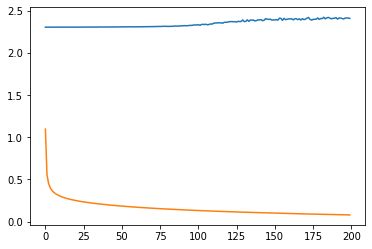

In [ ]:
plt.plot(history_1)
plt.plot(history_2)

Pas de convergence sans préentrainement (ça sera surement la conclusion pour différents nombre de layers)

### Expérience 2

### Expérience 3

### Hyperparameter tuning